Loaded dataset with 159 records and 10 variables
Clustering with 6 features: ['demo_young_educated', 'demo_young_uneducated', 'demo_older_educated', 'demo_older_uneducated', 'high_needs_binary', 'high_barriers_binary']

Determining optimal number of clusters using K-means...
K=2: Silhouette Score = 0.3914
K=3: Silhouette Score = 0.4833
K=4: Silhouette Score = 0.5633
K=5: Silhouette Score = 0.6161
K=6: Silhouette Score = 0.7362
K=7: Silhouette Score = 0.7865

Optimal number of clusters: 7


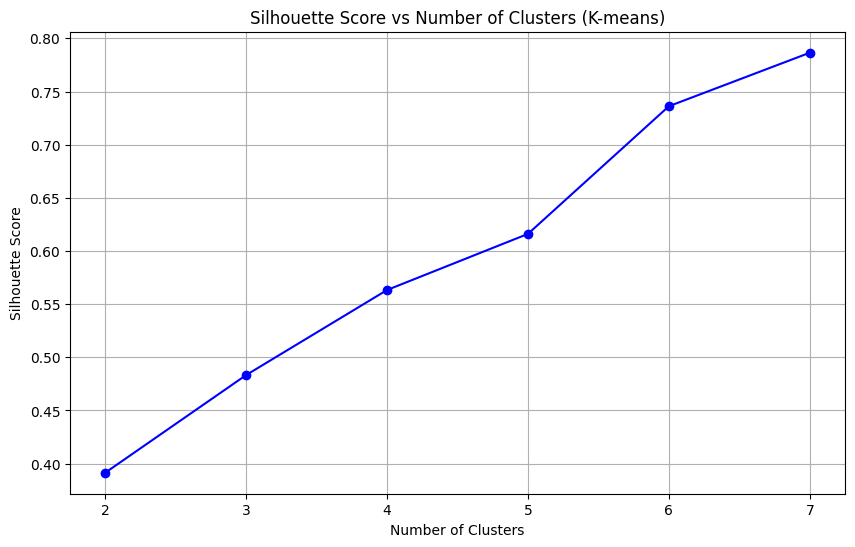


Comparing clustering algorithms with k=7...

Testing K-means...
  Clusters: 7
  Noise points: 0
  Silhouette Score: 0.7865
  Davies-Bouldin Index: 0.4653
  Calinski-Harabasz Index: 220.64
  Execution Time: 0.0385s

Testing Hierarchical (Ward)...
  Clusters: 7
  Noise points: 0
  Silhouette Score: 0.7800
  Davies-Bouldin Index: 0.4493
  Calinski-Harabasz Index: 210.27
  Execution Time: 0.0065s

Testing Spectral...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


  Clusters: 7
  Noise points: 0
  Silhouette Score: 0.4666
  Davies-Bouldin Index: 0.8438
  Calinski-Harabasz Index: 53.34
  Execution Time: 0.1643s

Testing Birch...
  Clusters: 7
  Noise points: 0
  Silhouette Score: 0.6363
  Davies-Bouldin Index: 0.6498
  Calinski-Harabasz Index: 131.66
  Execution Time: 0.0112s

Testing Gaussian Mixture...
  Clusters: 7
  Noise points: 0
  Silhouette Score: 0.7025
  Davies-Bouldin Index: 0.5526
  Calinski-Harabasz Index: 152.80
  Execution Time: 0.0094s

Testing DBSCAN...
  Clusters: 10
  Noise points: 11
  Silhouette Score: 1.0000
  Davies-Bouldin Index: 0.0000
  Calinski-Harabasz Index: 376521609753560085646113970847744.00
  Execution Time: 0.0037s

CLUSTERING ALGORITHM COMPARISON RESULTS
  Clustering Algorithm  Silhouette Score  Davies-Bouldin Index  \
0              K-means            0.7865                0.4653   
1  Hierarchical (Ward)            0.7800                0.4493   
2             Spectral            0.4666                0.8438  

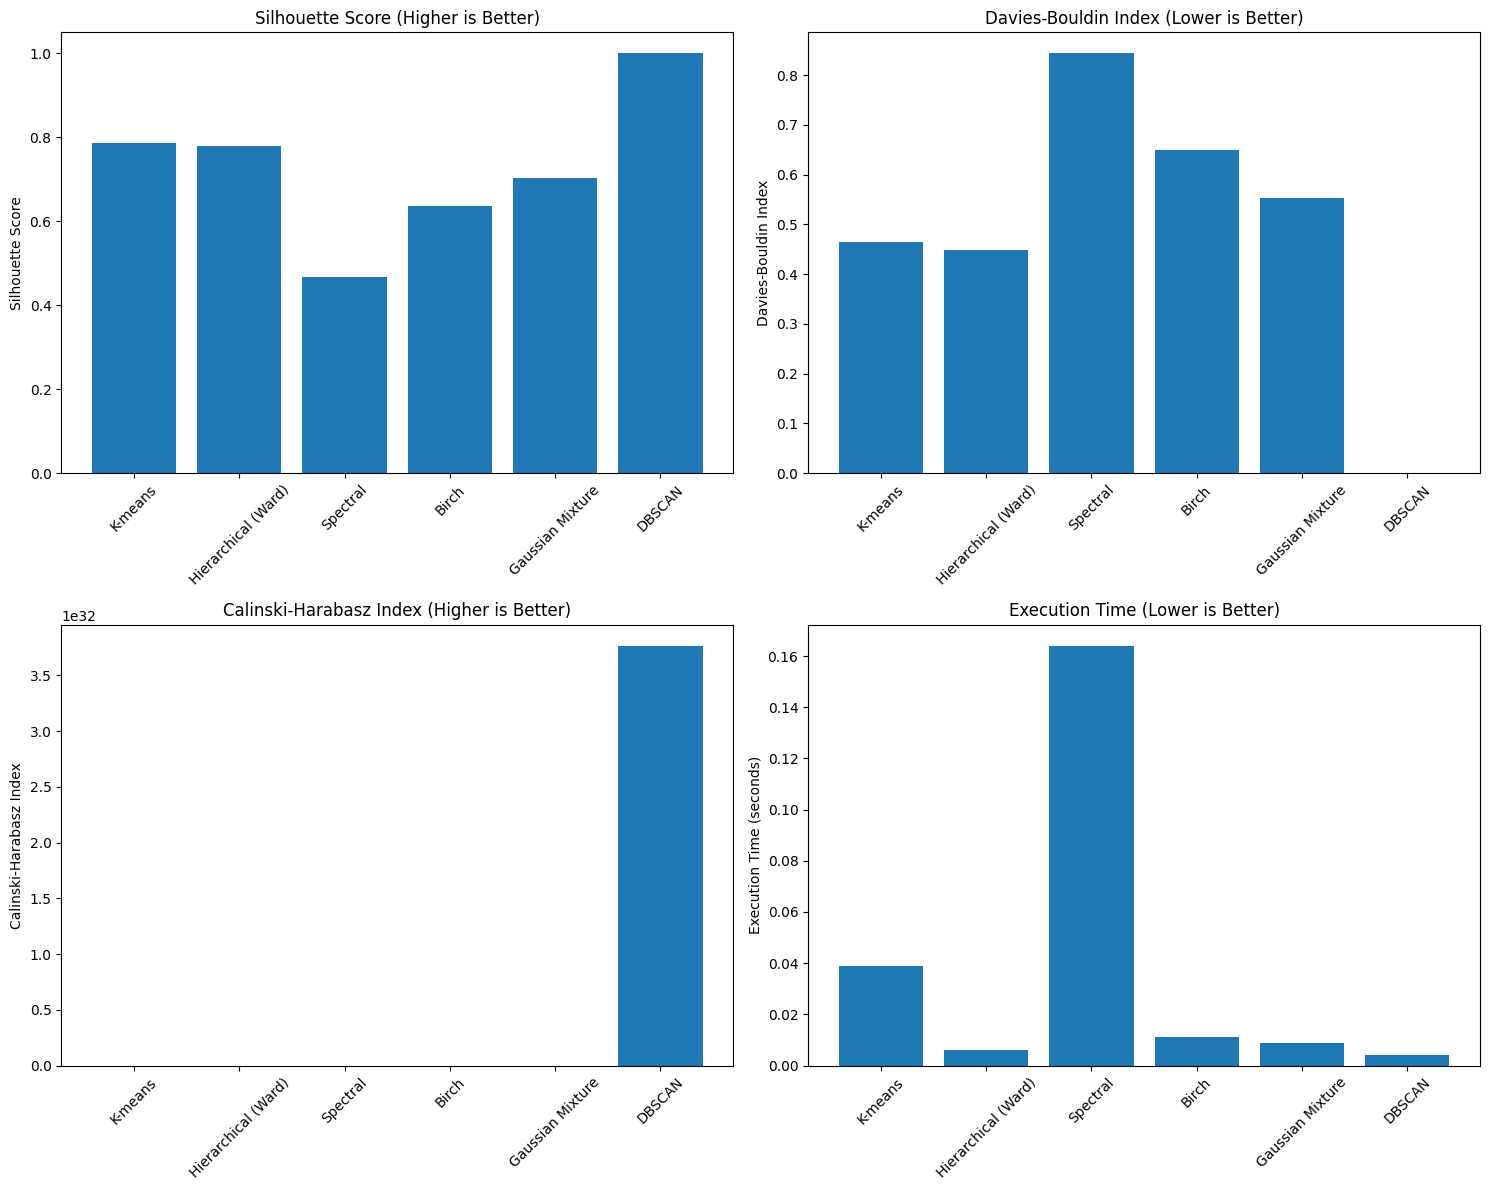


BEST PERFORMING ALGORITHMS BY METRIC
Best Silhouette Score: DBSCAN (1.000)
Best Davies-Bouldin Index: DBSCAN (0.000)
Best Calinski-Harabasz Index: DBSCAN (376521609753560085646113970847744.00)
Fastest Execution: DBSCAN (0.004s)

DETAILED ANALYSIS WITH BEST ALGORITHM: DBSCAN

Cluster Profiles:
         demo_young_educated  demo_young_uneducated  demo_older_educated  \
cluster                                                                    
-1                     0.182                    0.0                0.091   
 0                     0.000                    1.0                0.000   
 1                     1.000                    0.0                0.000   
 2                     1.000                    0.0                0.000   
 3                     0.000                    0.0                0.000   
 4                     0.000                    1.0                0.000   
 5                     0.000                    1.0                0.000   
 6                   

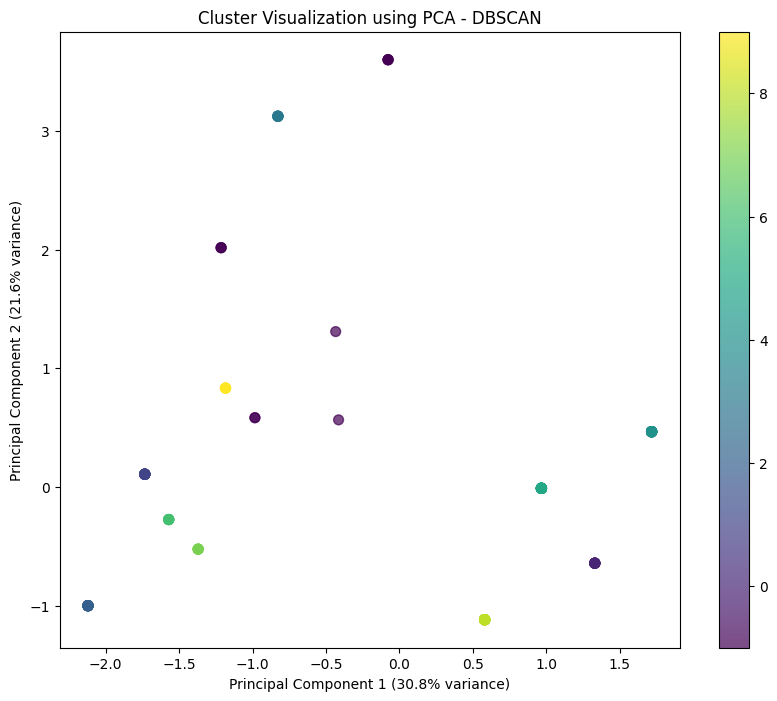


STATISTICAL VALIDATION OF CLUSTER DIFFERENCES
sought_care_recently: Kruskal-Wallis p=0.0634 ✗
  Cluster means: ['0.22', '0.73', '0.67', '1.00', '0.52', '0.56', '0.50', '0.60', '0.65', '1.00']
pct_times_get_Care: Kruskal-Wallis p=0.0381 ✓
  Cluster means: ['0.83', '0.82', '0.88', '0.83', '0.84', '0.85', '0.92', '0.64', '0.97', '0.93']
mean_satisfaction: Kruskal-Wallis p=0.1754 ✗
  Cluster means: ['3.07', '3.08', '3.36', '3.34', '2.97', '3.02', '3.25', '3.09', '3.37', '3.21']

Analysis complete! Results saved to 'clustering_comparison_results.csv'
Best performing algorithm: DBSCAN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, Birch, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

# Load the final dataset
df = pd.read_csv('final_dataset_wic.csv')
print(f"Loaded dataset with {len(df)} records and {len(df.columns)} variables")

# Prepare data for clustering
# Extract clustering features (exclude ID and outcome variables)
clustering_features = ['demo_young_educated', 'demo_young_uneducated',
                      'demo_older_educated', 'demo_older_uneducated',
                      'high_needs_binary', 'high_barriers_binary']

X = df[clustering_features].values
print(f"Clustering with {len(clustering_features)} features: {clustering_features}")

# Standardize the data (good practice even for binary data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define clustering algorithms to test
clustering_algorithms = {
    'K-means': lambda n_clusters: KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
    'Hierarchical (Ward)': lambda n_clusters: AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
    'Spectral': lambda n_clusters: SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'Birch': lambda n_clusters: Birch(n_clusters=n_clusters),
    'Gaussian Mixture': lambda n_clusters: GaussianMixture(n_components=n_clusters, random_state=42),
    'DBSCAN': lambda n_clusters: DBSCAN(eps=0.8, min_samples=5)  # DBSCAN doesn't use n_clusters
}

# First, determine optimal number of clusters using K-means
print("\nDetermining optimal number of clusters using K-means...")
k_range = range(2, 8)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Find optimal k
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters: {optimal_k}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (K-means)')
plt.grid(True)
plt.savefig('optimal_clusters_selection.png')
plt.show()

# Now compare all clustering algorithms
print(f"\nComparing clustering algorithms with k={optimal_k}...")
print("=" * 80)

results = {
    'Clustering Algorithm': [],
    'Silhouette Score': [],
    'Davies-Bouldin Index': [],
    'Calinski-Harabasz Index': [],
    'Execution Time': [],
    'Number of Clusters': [],
    'Number of Noise Points': []
}

for name, algorithm_func in clustering_algorithms.items():
    print(f"\nTesting {name}...")

    try:
        # Measure execution time
        start_time = time.time()

        # Create and fit the algorithm
        if name == 'DBSCAN':
            algorithm = algorithm_func(None)  # DBSCAN doesn't need n_clusters
            labels = algorithm.fit_predict(X_scaled)
            n_clusters_actual = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
        else:
            algorithm = algorithm_func(optimal_k)
            if name == 'Gaussian Mixture':
                algorithm.fit(X_scaled)
                labels = algorithm.predict(X_scaled)
            else:
                labels = algorithm.fit_predict(X_scaled)
            n_clusters_actual = optimal_k
            n_noise = 0

        execution_time = time.time() - start_time

        # Calculate metrics (exclude noise points for DBSCAN)
        if name == 'DBSCAN' and -1 in labels:
            # For DBSCAN with noise points, calculate metrics only on non-noise points
            mask = labels != -1
            if sum(mask) > 1 and len(set(labels[mask])) > 1:
                X_no_noise = X_scaled[mask]
                labels_no_noise = labels[mask]
                silhouette = silhouette_score(X_no_noise, labels_no_noise)
                davies_bouldin = davies_bouldin_score(X_no_noise, labels_no_noise)
                calinski_harabasz = calinski_harabasz_score(X_no_noise, labels_no_noise)
            else:
                silhouette = np.nan
                davies_bouldin = np.nan
                calinski_harabasz = np.nan
        else:
            # Standard calculation for other algorithms
            if len(set(labels)) > 1:
                silhouette = silhouette_score(X_scaled, labels)
                davies_bouldin = davies_bouldin_score(X_scaled, labels)
                calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
            else:
                silhouette = np.nan
                davies_bouldin = np.nan
                calinski_harabasz = np.nan

        # Store results
        results['Clustering Algorithm'].append(name)
        results['Silhouette Score'].append(silhouette)
        results['Davies-Bouldin Index'].append(davies_bouldin)
        results['Calinski-Harabasz Index'].append(calinski_harabasz)
        results['Execution Time'].append(execution_time)
        results['Number of Clusters'].append(n_clusters_actual)
        results['Number of Noise Points'].append(n_noise)

        print(f"  Clusters: {n_clusters_actual}")
        print(f"  Noise points: {n_noise}")
        print(f"  Silhouette Score: {silhouette:.4f}")
        print(f"  Davies-Bouldin Index: {davies_bouldin:.4f}")
        print(f"  Calinski-Harabasz Index: {calinski_harabasz:.2f}")
        print(f"  Execution Time: {execution_time:.4f}s")

    except Exception as e:
        print(f"  Error with {name}: {str(e)}")
        # Store NaN values for failed algorithms
        results['Clustering Algorithm'].append(name)
        results['Silhouette Score'].append(np.nan)
        results['Davies-Bouldin Index'].append(np.nan)
        results['Calinski-Harabasz Index'].append(np.nan)
        results['Execution Time'].append(np.nan)
        results['Number of Clusters'].append(np.nan)
        results['Number of Noise Points'].append(np.nan)

# Create results DataFrame
results_df = pd.DataFrame(results)

# Create comparison table
print("\n" + "=" * 80)
print("CLUSTERING ALGORITHM COMPARISON RESULTS")
print("=" * 80)

# Format the table nicely
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(results_df.round(4))

# Save results
results_df.to_csv('clustering_comparison_results.csv', index=False)

# Create a formatted table for publication
print("\n" + "=" * 80)
print("FORMATTED TABLE FOR PUBLICATION")
print("=" * 80)

formatted_table = results_df.copy()
formatted_table = formatted_table.dropna()  # Remove failed algorithms

# Round to appropriate decimal places
formatted_table['Silhouette Score'] = formatted_table['Silhouette Score'].round(3)
formatted_table['Davies-Bouldin Index'] = formatted_table['Davies-Bouldin Index'].round(3)
formatted_table['Calinski-Harabasz Index'] = formatted_table['Calinski-Harabasz Index'].round(2)
formatted_table['Execution Time'] = formatted_table['Execution Time'].round(3)

print(formatted_table[['Clustering Algorithm', 'Silhouette Score', 'Davies-Bouldin Index',
                      'Calinski-Harabasz Index', 'Execution Time']])

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Remove any rows with NaN values for plotting
plot_data = formatted_table.dropna()

# Silhouette Score (higher is better)
axes[0, 0].bar(plot_data['Clustering Algorithm'], plot_data['Silhouette Score'])
axes[0, 0].set_title('Silhouette Score (Higher is Better)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# Davies-Bouldin Index (lower is better)
axes[0, 1].bar(plot_data['Clustering Algorithm'], plot_data['Davies-Bouldin Index'])
axes[0, 1].set_title('Davies-Bouldin Index (Lower is Better)')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].tick_params(axis='x', rotation=45)

# Calinski-Harabasz Index (higher is better)
axes[1, 0].bar(plot_data['Clustering Algorithm'], plot_data['Calinski-Harabasz Index'])
axes[1, 0].set_title('Calinski-Harabasz Index (Higher is Better)')
axes[1, 0].set_ylabel('Calinski-Harabasz Index')
axes[1, 0].tick_params(axis='x', rotation=45)

# Execution Time (lower is better)
axes[1, 1].bar(plot_data['Clustering Algorithm'], plot_data['Execution Time'])
axes[1, 1].set_title('Execution Time (Lower is Better)')
axes[1, 1].set_ylabel('Execution Time (seconds)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('clustering_comparison_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify best performing algorithm
best_silhouette = plot_data.loc[plot_data['Silhouette Score'].idxmax()]
best_davies_bouldin = plot_data.loc[plot_data['Davies-Bouldin Index'].idxmin()]
best_calinski = plot_data.loc[plot_data['Calinski-Harabasz Index'].idxmax()]
fastest = plot_data.loc[plot_data['Execution Time'].idxmin()]

print("\n" + "=" * 80)
print("BEST PERFORMING ALGORITHMS BY METRIC")
print("=" * 80)
print(f"Best Silhouette Score: {best_silhouette['Clustering Algorithm']} ({best_silhouette['Silhouette Score']:.3f})")
print(f"Best Davies-Bouldin Index: {best_davies_bouldin['Clustering Algorithm']} ({best_davies_bouldin['Davies-Bouldin Index']:.3f})")
print(f"Best Calinski-Harabasz Index: {best_calinski['Clustering Algorithm']} ({best_calinski['Calinski-Harabasz Index']:.2f})")
print(f"Fastest Execution: {fastest['Clustering Algorithm']} ({fastest['Execution Time']:.3f}s)")

# Perform detailed analysis with the best algorithm
best_algorithm_name = best_silhouette['Clustering Algorithm']
print(f"\n" + "=" * 80)
print(f"DETAILED ANALYSIS WITH BEST ALGORITHM: {best_algorithm_name}")
print("=" * 80)

# Re-run best algorithm and get cluster labels
if best_algorithm_name == 'DBSCAN':
    best_algorithm = DBSCAN(eps=0.8, min_samples=5)
    cluster_labels = best_algorithm.fit_predict(X_scaled)
else:
    if best_algorithm_name == 'K-means':
        best_algorithm = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        cluster_labels = best_algorithm.fit_predict(X_scaled)
    elif best_algorithm_name == 'Hierarchical (Ward)':
        best_algorithm = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
        cluster_labels = best_algorithm.fit_predict(X_scaled)
    elif best_algorithm_name == 'Spectral':
        best_algorithm = SpectralClustering(n_clusters=optimal_k, random_state=42, affinity='nearest_neighbors')
        cluster_labels = best_algorithm.fit_predict(X_scaled)
    elif best_algorithm_name == 'Birch':
        best_algorithm = Birch(n_clusters=optimal_k)
        cluster_labels = best_algorithm.fit_predict(X_scaled)
    elif best_algorithm_name == 'Gaussian Mixture':
        best_algorithm = GaussianMixture(n_components=optimal_k, random_state=42)
        best_algorithm.fit(X_scaled)
        cluster_labels = best_algorithm.predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

# Create cluster profiles
cluster_profiles = df.groupby('cluster')[clustering_features + ['sought_care_recently', 'pct_times_get_Care', 'mean_satisfaction']].mean()

print("\nCluster Profiles:")
print(cluster_profiles.round(3))

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title(f'Cluster Visualization using PCA - {best_algorithm_name}')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.savefig('cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical validation of outcome differences
print("\n" + "=" * 80)
print("STATISTICAL VALIDATION OF CLUSTER DIFFERENCES")
print("=" * 80)

outcome_vars = ['sought_care_recently', 'pct_times_get_Care', 'mean_satisfaction']

for var in outcome_vars:
    # Exclude noise points if present
    if -1 in cluster_labels:
        df_no_noise = df[df['cluster'] != -1]
        groups = [df_no_noise[df_no_noise['cluster'] == i][var].dropna()
                 for i in sorted(set(df_no_noise['cluster']))]
    else:
        groups = [df[df['cluster'] == i][var].dropna()
                 for i in sorted(set(df['cluster']))]

    if any(len(group) < 2 for group in groups):
        print(f"{var}: Not enough data for statistical test")
        continue

    # Kruskal-Wallis test (non-parametric)
    h_stat, p_val = stats.kruskal(*groups)
    significant = "✓" if p_val < 0.05 else "✗"

    print(f"{var}: Kruskal-Wallis p={p_val:.4f} {significant}")
    means = [group.mean() for group in groups]
    print(f"  Cluster means: {[f'{m:.2f}' for m in means]}")

print(f"\nAnalysis complete! Results saved to 'clustering_comparison_results.csv'")
print(f"Best performing algorithm: {best_algorithm_name}")

CLUSTERING ANALYSIS: FOUR DEMOGRAPHIC APPROACHES

==================== EMPLOYMENT APPROACH ====================
Loaded dataset_employment.csv with 159 records
Clustering features: ['demo_young_employed', 'demo_young_unemployed', 'demo_old_employed', 'demo_old_unemployed', 'high_needs_binary', 'high_barriers_binary']
Optimal number of clusters: 7

Testing clustering algorithms:
  Testing K-means...
    Silhouette: 0.7472
  Testing Hierarchical (Ward)...
    Silhouette: 0.7472
  Testing Spectral...
    Silhouette: 0.5900
  Testing Birch...
    Silhouette: 0.6239
  Testing Gaussian Mixture...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    Silhouette: 0.7251
  Testing DBSCAN...
    Silhouette: 1.0000

Best algorithm: DBSCAN
Best silhouette score: 1.0000

Statistical significance of outcomes:
  sought_care_recently: p=0.1386 ✗
  pct_times_get_Care: p=0.1121 ✗
  mean_satisfaction: p=0.0139 ✓

==================== DIFFICULTY_AFFORDING APPROACH ====================
Loaded dataset_difficulty_affording.csv with 159 records
Clustering features: ['demo_young_difficulty', 'demo_young_no_difficulty', 'demo_old_difficulty', 'demo_old_no_difficulty', 'high_needs_binary', 'high_barriers_binary']
Optimal number of clusters: 7

Testing clustering algorithms:
  Testing K-means...
    Silhouette: 0.7443
  Testing Hierarchical (Ward)...
    Silhouette: 0.7443
  Testing Spectral...
    Silhouette: 0.7047
  Testing Birch...
    Silhouette: 0.6316
  Testing Gaussian Mixture...
    Silhouette: 0.6477
  Testing DBSCAN...
    Silhouette: 1.0000

Best algorithm: DBSCAN
Best silhouette score: 1.0000

Statistical significance of outcomes:
  so

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Optimal number of clusters: 7

Testing clustering algorithms:
  Testing K-means...
    Silhouette: 0.7335
  Testing Hierarchical (Ward)...
    Silhouette: 0.7335
  Testing Spectral...
    Silhouette: 0.6488
  Testing Birch...
    Silhouette: 0.6125
  Testing Gaussian Mixture...
    Silhouette: 0.7209
  Testing DBSCAN...
    Silhouette: 1.0000

Best algorithm: DBSCAN
Best silhouette score: 1.0000

Statistical significance of outcomes:
  sought_care_recently: p=0.0465 ✓
  pct_times_get_Care: p=0.0593 ✗
  mean_satisfaction: p=0.0978 ✗

==================== EDUCATION APPROACH ====================
Loaded dataset_education.csv with 159 records
Clustering features: ['demo_young_educated', 'demo_young_uneducated', 'demo_older_educated', 'demo_older_uneducated', 'high_needs_binary', 'high_barriers_binary']


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Optimal number of clusters: 7

Testing clustering algorithms:
  Testing K-means...
    Silhouette: 0.7865
  Testing Hierarchical (Ward)...
    Silhouette: 0.7800
  Testing Spectral...
    Silhouette: 0.4666
  Testing Birch...
    Silhouette: 0.6363
  Testing Gaussian Mixture...
    Silhouette: 0.7025
  Testing DBSCAN...
    Silhouette: 1.0000

Best algorithm: DBSCAN
Best silhouette score: 1.0000

Statistical significance of outcomes:
  sought_care_recently: p=0.0634 ✗
  pct_times_get_Care: p=0.0381 ✓
  mean_satisfaction: p=0.1754 ✗

SUMMARY OF RESULTS ACROSS ALL APPROACHES
            Approach Best Algorithm  Silhouette Score  Davies-Bouldin  Calinski-Harabasz  Optimal K  N Records Significant Outcomes
          Employment         DBSCAN               1.0             0.0       2.195628e+32          7        159                  1/3
Difficulty_Affording         DBSCAN               1.0             0.0       2.015114e+32          7        159                  2/3
      Race_Ethnicity    

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


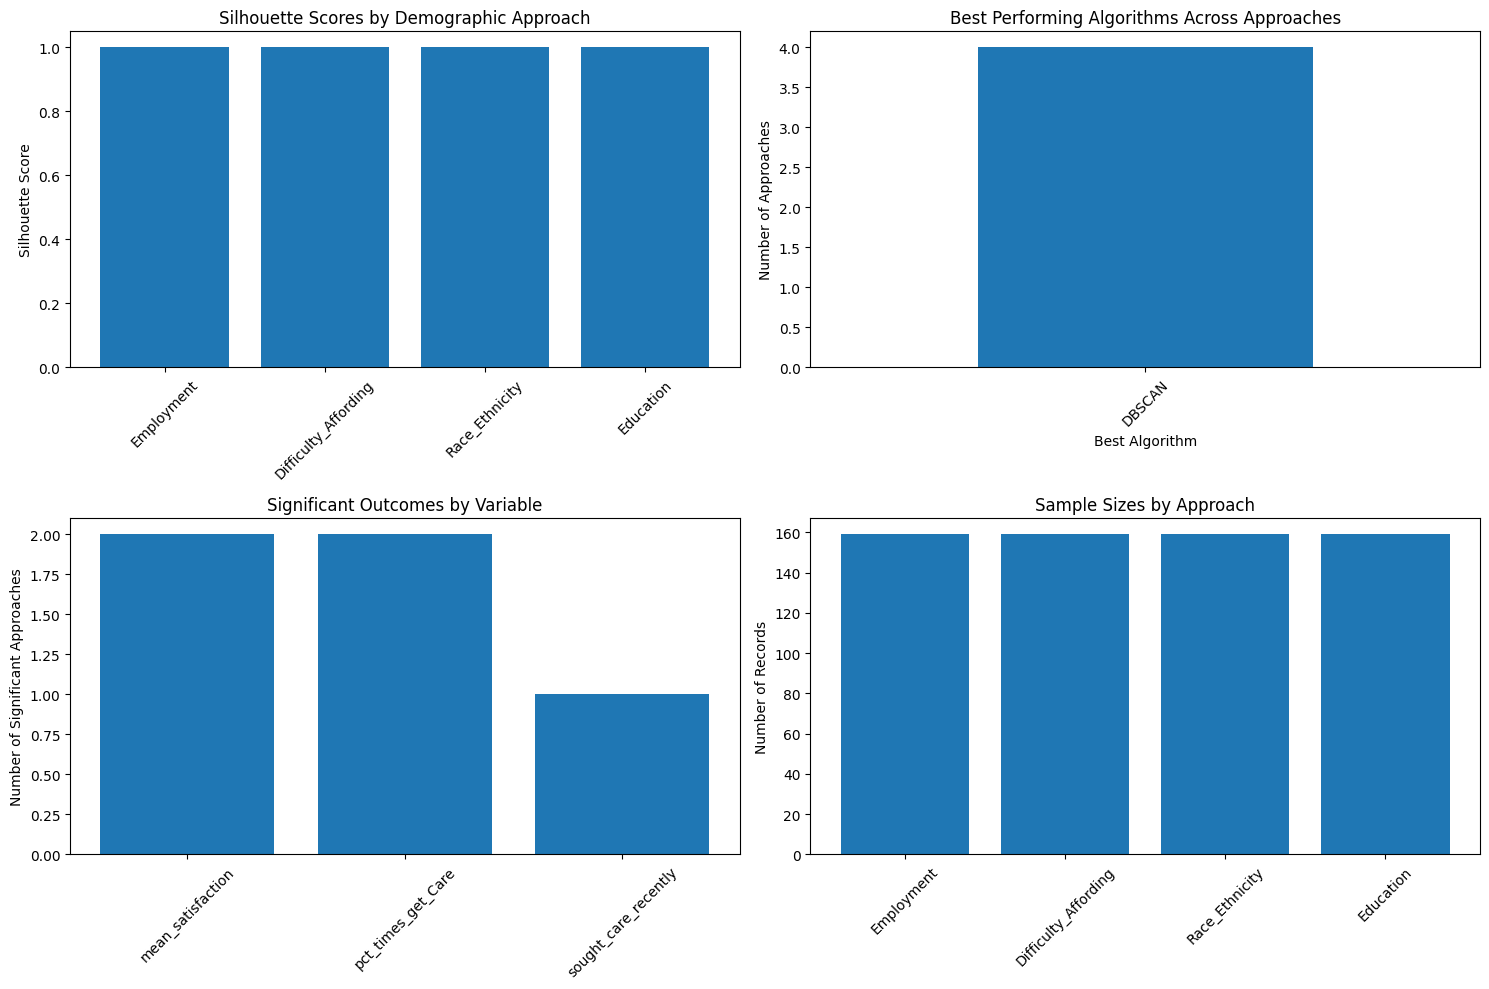


Analysis complete! Visualization saved as 'clustering_approaches_comparison.png'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, Birch, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

# Define the datasets and their corresponding demographic variables
datasets_info = {
    'Employment': {
        'filename': 'dataset_employment.csv',
        'demo_vars': ['demo_young_employed', 'demo_young_unemployed', 'demo_old_employed', 'demo_old_unemployed']
    },
    'Difficulty_Affording': {
        'filename': 'dataset_difficulty_affording.csv',
        'demo_vars': ['demo_young_difficulty', 'demo_young_no_difficulty', 'demo_old_difficulty', 'demo_old_no_difficulty']
    },
    'Race_Ethnicity': {
        'filename': 'dataset_race_ethnicity.csv',
        'demo_vars': ['demo_young_poc', 'demo_young_white', 'demo_old_poc', 'demo_old_white']
    },
    'Education': {
        'filename': 'dataset_education.csv',
        'demo_vars': ['demo_young_educated', 'demo_young_uneducated', 'demo_older_educated', 'demo_older_uneducated']
    }
}

# Shared variables across all datasets
shared_vars = ['high_needs_binary', 'high_barriers_binary']
outcome_vars = ['sought_care_recently', 'pct_times_get_Care', 'mean_satisfaction']

# Define clustering algorithms
def get_clustering_algorithms(optimal_k):
    return {
        'K-means': lambda: KMeans(n_clusters=optimal_k, random_state=42, n_init=10),
        'Hierarchical (Ward)': lambda: AgglomerativeClustering(n_clusters=optimal_k, linkage='ward'),
        'Spectral': lambda: SpectralClustering(n_clusters=optimal_k, random_state=42, affinity='nearest_neighbors'),
        'Birch': lambda: Birch(n_clusters=optimal_k),
        'Gaussian Mixture': lambda: GaussianMixture(n_components=optimal_k, random_state=42),
        'DBSCAN': lambda: DBSCAN(eps=0.8, min_samples=5)
    }

def find_optimal_clusters(X_scaled, max_k=8):
    """Find optimal number of clusters using silhouette score"""
    k_range = range(2, max_k)
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)

    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    return optimal_k, silhouette_scores, k_range

def evaluate_clustering_algorithm(algorithm, algorithm_name, X_scaled, optimal_k):
    """Evaluate a single clustering algorithm"""
    try:
        start_time = time.time()

        if algorithm_name == 'DBSCAN':
            labels = algorithm.fit_predict(X_scaled)
            n_clusters_actual = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
        else:
            if algorithm_name == 'Gaussian Mixture':
                algorithm.fit(X_scaled)
                labels = algorithm.predict(X_scaled)
            else:
                labels = algorithm.fit_predict(X_scaled)
            n_clusters_actual = optimal_k
            n_noise = 0

        execution_time = time.time() - start_time

        # Calculate metrics
        if algorithm_name == 'DBSCAN' and -1 in labels:
            mask = labels != -1
            if sum(mask) > 1 and len(set(labels[mask])) > 1:
                X_no_noise = X_scaled[mask]
                labels_no_noise = labels[mask]
                silhouette = silhouette_score(X_no_noise, labels_no_noise)
                davies_bouldin = davies_bouldin_score(X_no_noise, labels_no_noise)
                calinski_harabasz = calinski_harabasz_score(X_no_noise, labels_no_noise)
            else:
                silhouette = np.nan
                davies_bouldin = np.nan
                calinski_harabasz = np.nan
        else:
            if len(set(labels)) > 1:
                silhouette = silhouette_score(X_scaled, labels)
                davies_bouldin = davies_bouldin_score(X_scaled, labels)
                calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
            else:
                silhouette = np.nan
                davies_bouldin = np.nan
                calinski_harabasz = np.nan

        return {
            'labels': labels,
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin,
            'calinski_harabasz': calinski_harabasz,
            'execution_time': execution_time,
            'n_clusters': n_clusters_actual,
            'n_noise': n_noise
        }

    except Exception as e:
        print(f"    Error with {algorithm_name}: {str(e)}")
        return None

def test_statistical_significance(df, cluster_labels, outcome_vars):
    """Test statistical significance of outcome differences between clusters"""
    df_test = df.copy()
    df_test['cluster'] = cluster_labels

    results = {}

    for var in outcome_vars:
        # Exclude noise points if present
        if -1 in cluster_labels:
            df_no_noise = df_test[df_test['cluster'] != -1]
            groups = [df_no_noise[df_no_noise['cluster'] == i][var].dropna()
                     for i in sorted(set(df_no_noise['cluster']))]
        else:
            groups = [df_test[df_test['cluster'] == i][var].dropna()
                     for i in sorted(set(df_test['cluster']))]

        if any(len(group) < 2 for group in groups):
            results[var] = {'p_value': np.nan, 'test': 'insufficient_data'}
            continue

        # Kruskal-Wallis test (non-parametric)
        h_stat, p_val = stats.kruskal(*groups)
        results[var] = {'p_value': p_val, 'test': 'kruskal_wallis'}

    return results

# Initialize results storage
all_results = {}

print("="*80)
print("CLUSTERING ANALYSIS: FOUR DEMOGRAPHIC APPROACHES")
print("="*80)

# Process each dataset
for approach_name, info in datasets_info.items():
    print(f"\n{'='*20} {approach_name.upper()} APPROACH {'='*20}")

    # Load dataset
    try:
        df = pd.read_csv(info['filename'])
        print(f"Loaded {info['filename']} with {len(df)} records")
    except FileNotFoundError:
        print(f"Error: {info['filename']} not found. Please run data engineering code first.")
        continue

    # Prepare clustering features
    clustering_features = info['demo_vars'] + shared_vars
    print(f"Clustering features: {clustering_features}")

    X = df[clustering_features].values

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Find optimal number of clusters
    optimal_k, silhouette_scores, k_range = find_optimal_clusters(X_scaled)
    print(f"Optimal number of clusters: {optimal_k}")

    # Test all clustering algorithms
    algorithms = get_clustering_algorithms(optimal_k)
    approach_results = {}

    print("\nTesting clustering algorithms:")

    for alg_name, alg_func in algorithms.items():
        print(f"  Testing {alg_name}...")
        algorithm = alg_func()
        result = evaluate_clustering_algorithm(algorithm, alg_name, X_scaled, optimal_k)

        if result is not None:
            approach_results[alg_name] = result
            print(f"    Silhouette: {result['silhouette']:.4f}")

    # Find best algorithm
    valid_results = {k: v for k, v in approach_results.items()
                    if not np.isnan(v['silhouette'])}

    if valid_results:
        best_algorithm = max(valid_results.keys(),
                           key=lambda x: valid_results[x]['silhouette'])
        best_result = valid_results[best_algorithm]

        print(f"\nBest algorithm: {best_algorithm}")
        print(f"Best silhouette score: {best_result['silhouette']:.4f}")

        # Test statistical significance with best algorithm
        significance_results = test_statistical_significance(
            df, best_result['labels'], outcome_vars)

        print(f"\nStatistical significance of outcomes:")
        for var, sig_result in significance_results.items():
            p_val = sig_result['p_value']
            significant = "✓" if p_val < 0.05 else "✗"
            print(f"  {var}: p={p_val:.4f} {significant}")

        # Store results
        all_results[approach_name] = {
            'best_algorithm': best_algorithm,
            'best_silhouette': best_result['silhouette'],
            'best_davies_bouldin': best_result['davies_bouldin'],
            'best_calinski_harabasz': best_result['calinski_harabasz'],
            'optimal_k': optimal_k,
            'n_records': len(df),
            'significance_results': significance_results,
            'all_algorithm_results': approach_results
        }
    else:
        print(f"No valid clustering results for {approach_name}")
        all_results[approach_name] = None

print("\n" + "="*80)
print("SUMMARY OF RESULTS ACROSS ALL APPROACHES")
print("="*80)

# Create summary table
summary_data = []
for approach, results in all_results.items():
    if results is not None:
        # Count significant outcomes
        sig_count = sum(1 for var, sig_result in results['significance_results'].items()
                       if sig_result['p_value'] < 0.05)

        summary_data.append({
            'Approach': approach,
            'Best Algorithm': results['best_algorithm'],
            'Silhouette Score': round(results['best_silhouette'], 4),
            'Davies-Bouldin': round(results['best_davies_bouldin'], 4),
            'Calinski-Harabasz': round(results['best_calinski_harabasz'], 2),
            'Optimal K': results['optimal_k'],
            'N Records': results['n_records'],
            'Significant Outcomes': f"{sig_count}/3"
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Detailed significance results
print("\n" + "="*80)
print("DETAILED SIGNIFICANCE RESULTS")
print("="*80)

sig_summary_data = []
for approach, results in all_results.items():
    if results is not None:
        for var, sig_result in results['significance_results'].items():
            p_val = sig_result['p_value']
            significant = "Yes" if p_val < 0.05 else "No"
            sig_summary_data.append({
                'Approach': approach,
                'Outcome Variable': var,
                'P-value': round(p_val, 4) if not np.isnan(p_val) else 'N/A',
                'Significant': significant
            })

sig_summary_df = pd.DataFrame(sig_summary_data)
print(sig_summary_df.to_string(index=False))

# Save results
summary_df.to_csv('clustering_approaches_summary.csv', index=False)
sig_summary_df.to_csv('significance_results_summary.csv', index=False)

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

# Best performing approach
best_approach = summary_df.loc[summary_df['Silhouette Score'].idxmax()]
print(f"Best performing approach: {best_approach['Approach']}")
print(f"  Algorithm: {best_approach['Best Algorithm']}")
print(f"  Silhouette Score: {best_approach['Silhouette Score']}")

# Most common best algorithm
algorithm_counts = summary_df['Best Algorithm'].value_counts()
most_common_alg = algorithm_counts.index[0]
print(f"\nMost successful algorithm overall: {most_common_alg}")
print(f"  Used in {algorithm_counts[most_common_alg]}/{len(summary_df)} approaches")

# Significance patterns
print(f"\nOutcome variable significance across approaches:")
for var in outcome_vars:
    var_results = sig_summary_df[sig_summary_df['Outcome Variable'] == var]
    sig_count = sum(var_results['Significant'] == 'Yes')
    total_count = len(var_results)
    print(f"  {var}: {sig_count}/{total_count} approaches show significance")

print(f"\nResults saved:")
print(f"  - clustering_approaches_summary.csv")
print(f"  - significance_results_summary.csv")

# Create visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Silhouette scores by approach
plt.subplot(2, 2, 1)
plt.bar(summary_df['Approach'], summary_df['Silhouette Score'])
plt.title('Silhouette Scores by Demographic Approach')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)

# Subplot 2: Best algorithms
plt.subplot(2, 2, 2)
algorithm_counts.plot(kind='bar')
plt.title('Best Performing Algorithms Across Approaches')
plt.ylabel('Number of Approaches')
plt.xticks(rotation=45)

# Subplot 3: Significance counts
plt.subplot(2, 2, 3)
sig_counts = sig_summary_df.groupby('Outcome Variable')['Significant'].apply(lambda x: (x == 'Yes').sum())
plt.bar(sig_counts.index, sig_counts.values)
plt.title('Significant Outcomes by Variable')
plt.ylabel('Number of Significant Approaches')
plt.xticks(rotation=45)

# Subplot 4: Sample sizes
plt.subplot(2, 2, 4)
plt.bar(summary_df['Approach'], summary_df['N Records'])
plt.title('Sample Sizes by Approach')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('clustering_approaches_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAnalysis complete! Visualization saved as 'clustering_approaches_comparison.png'")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the difficulty affording dataset
df = pd.read_csv('dataset_difficulty_affording.csv')
print(f"Loaded dataset with {len(df)} records")

# Prepare clustering features
clustering_features = ['demo_young_difficulty', 'demo_young_no_difficulty',
                      'demo_old_difficulty', 'demo_old_no_difficulty',
                      'high_needs_binary', 'high_barriers_binary']

X = df[clustering_features].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n" + "="*80)
print("DIFFICULTY AFFORDING APPROACH - CLUSTER ASSIGNMENTS")
print("="*80)

# Run both DBSCAN (original best) and K-means (realistic best)
algorithms = {
    'DBSCAN': DBSCAN(eps=0.8, min_samples=5),
    'K-means': KMeans(n_clusters=7, random_state=42, n_init=10)
}

for alg_name, algorithm in algorithms.items():
    print(f"\n{'-'*20} {alg_name} RESULTS {'-'*20}")

    if alg_name == 'DBSCAN':
        cluster_labels = algorithm.fit_predict(X_scaled)
    else:
        cluster_labels = algorithm.fit_predict(X_scaled)

    # Add cluster labels to dataframe
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = cluster_labels

    # Get unique clusters (sorted)
    unique_clusters = sorted(df_with_clusters['cluster'].unique())

    print(f"Number of clusters found: {len(unique_clusters)}")
    if -1 in unique_clusters:
        noise_count = sum(cluster_labels == -1)
        print(f"Noise points: {noise_count}")

    # Extract Response IDs for each cluster
    for cluster_id in unique_clusters:
        cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster_id]
        response_ids = cluster_data['Response ID'].tolist()

        if cluster_id == -1:
            cluster_name = "Noise Points"
        else:
            cluster_name = f"Cluster {cluster_id}"

        print(f"\n{cluster_name} (n={len(response_ids)}):")

        # Print Response IDs in a formatted way (5 per line)
        for i in range(0, len(response_ids), 5):
            ids_line = response_ids[i:i+5]
            print(f"  {', '.join(ids_line)}")

        # Show demographic profile of this cluster
        print(f"  Profile:")
        young_diff_pct = cluster_data['demo_young_difficulty'].mean() * 100
        young_no_diff_pct = cluster_data['demo_young_no_difficulty'].mean() * 100
        old_diff_pct = cluster_data['demo_old_difficulty'].mean() * 100
        old_no_diff_pct = cluster_data['demo_old_no_difficulty'].mean() * 100
        high_needs_pct = cluster_data['high_needs_binary'].mean() * 100
        high_barriers_pct = cluster_data['high_barriers_binary'].mean() * 100

        print(f"    Young w/ difficulty: {young_diff_pct:.1f}%")
        print(f"    Young w/o difficulty: {young_no_diff_pct:.1f}%")
        print(f"    Old w/ difficulty: {old_diff_pct:.1f}%")
        print(f"    Old w/o difficulty: {old_no_diff_pct:.1f}%")
        print(f"    High health needs: {high_needs_pct:.1f}%")
        print(f"    High barriers: {high_barriers_pct:.1f}%")

        # Show outcomes
        sought_care_pct = cluster_data['sought_care_recently'].mean() * 100
        success_rate = cluster_data['pct_times_get_Care'].mean() * 100
        satisfaction = cluster_data['mean_satisfaction'].mean()

        print(f"  Outcomes:")
        print(f"    Sought care recently: {sought_care_pct:.1f}%")
        print(f"    Success getting care: {success_rate:.1f}%")
        print(f"    Mean satisfaction: {satisfaction:.2f}")

# Create CSV files with cluster assignments
print(f"\n" + "="*80)
print("SAVING CLUSTER ASSIGNMENTS TO CSV FILES")
print("="*80)

# Save DBSCAN results
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df_dbscan = df.copy()
df_dbscan['cluster'] = dbscan_labels
df_dbscan.to_csv('difficulty_affording_dbscan_clusters.csv', index=False)
print(f"DBSCAN cluster assignments saved to 'difficulty_affording_dbscan_clusters.csv'")

# Save K-means results
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df_kmeans = df.copy()
df_kmeans['cluster'] = kmeans_labels
df_kmeans.to_csv('difficulty_affording_kmeans_clusters.csv', index=False)
print(f"K-means cluster assignments saved to 'difficulty_affording_kmeans_clusters.csv'")

# Create summary table
print(f"\n" + "="*80)
print("CLUSTER SIZE SUMMARY")
print("="*80)

summary_data = []

# DBSCAN summary
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
for cluster_id, count in dbscan_counts.items():
    cluster_name = "Noise" if cluster_id == -1 else f"Cluster {cluster_id}"
    summary_data.append({
        'Algorithm': 'DBSCAN',
        'Cluster': cluster_name,
        'Count': count,
        'Percentage': f"{count/len(df)*100:.1f}%"
    })

# K-means summary
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
for cluster_id, count in kmeans_counts.items():
    summary_data.append({
        'Algorithm': 'K-means',
        'Cluster': f"Cluster {cluster_id}",
        'Count': count,
        'Percentage': f"{count/len(df)*100:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nAnalysis complete! Check the CSV files for complete cluster assignments.")

Loaded dataset with 159 records

DIFFICULTY AFFORDING APPROACH - CLUSTER ASSIGNMENTS

-------------------- DBSCAN RESULTS --------------------
Number of clusters found: 11
Noise points: 12

Noise Points (n=12):
  R_2eUTbqudYiK0bDT, R_27BT3noGnQOMoX0, R_UXzpiArdEpUewQ9, R_2a9RtIbJuWryD0i, R_2Cxm1RWntqTPfXw
  R_C152e232DIJ9sT7, R_1Ftx0ZJpdzsqtun, R_2YllVtPGz46SU2d, R_x9FbEaHhKBQ4g7v, R_3OfuZArErKFGyBz
  R_OuTbBvHi5rC7x8l, R_3RrRmQAL0atlH5j
  Profile:
    Young w/ difficulty: 0.0%
    Young w/o difficulty: 0.0%
    Old w/ difficulty: 58.3%
    Old w/o difficulty: 33.3%
    High health needs: 75.0%
    High barriers: 41.7%
  Outcomes:
    Sought care recently: 58.3%
    Success getting care: 72.3%
    Mean satisfaction: 2.89

Cluster 0 (n=7):
  R_3JCz3zdTAVO9cfh, R_27muUAoltP3tGcx, R_Q5pKMfmMswGC9cl, R_11iIxaoWMKUKmAG, R_31GJJEaFeOj7wMS
  R_1ptB528fTS7pWKV, R_1YbCXttGwgDD3u9
  Profile:
    Young w/ difficulty: 100.0%
    Young w/o difficulty: 0.0%
    Old w/ difficulty: 0.0%
    Old w/o di

Loading datasets...
Merged dataset contains 159 records with cluster assignments
Number of clusters: 7

Creating cluster portraits...


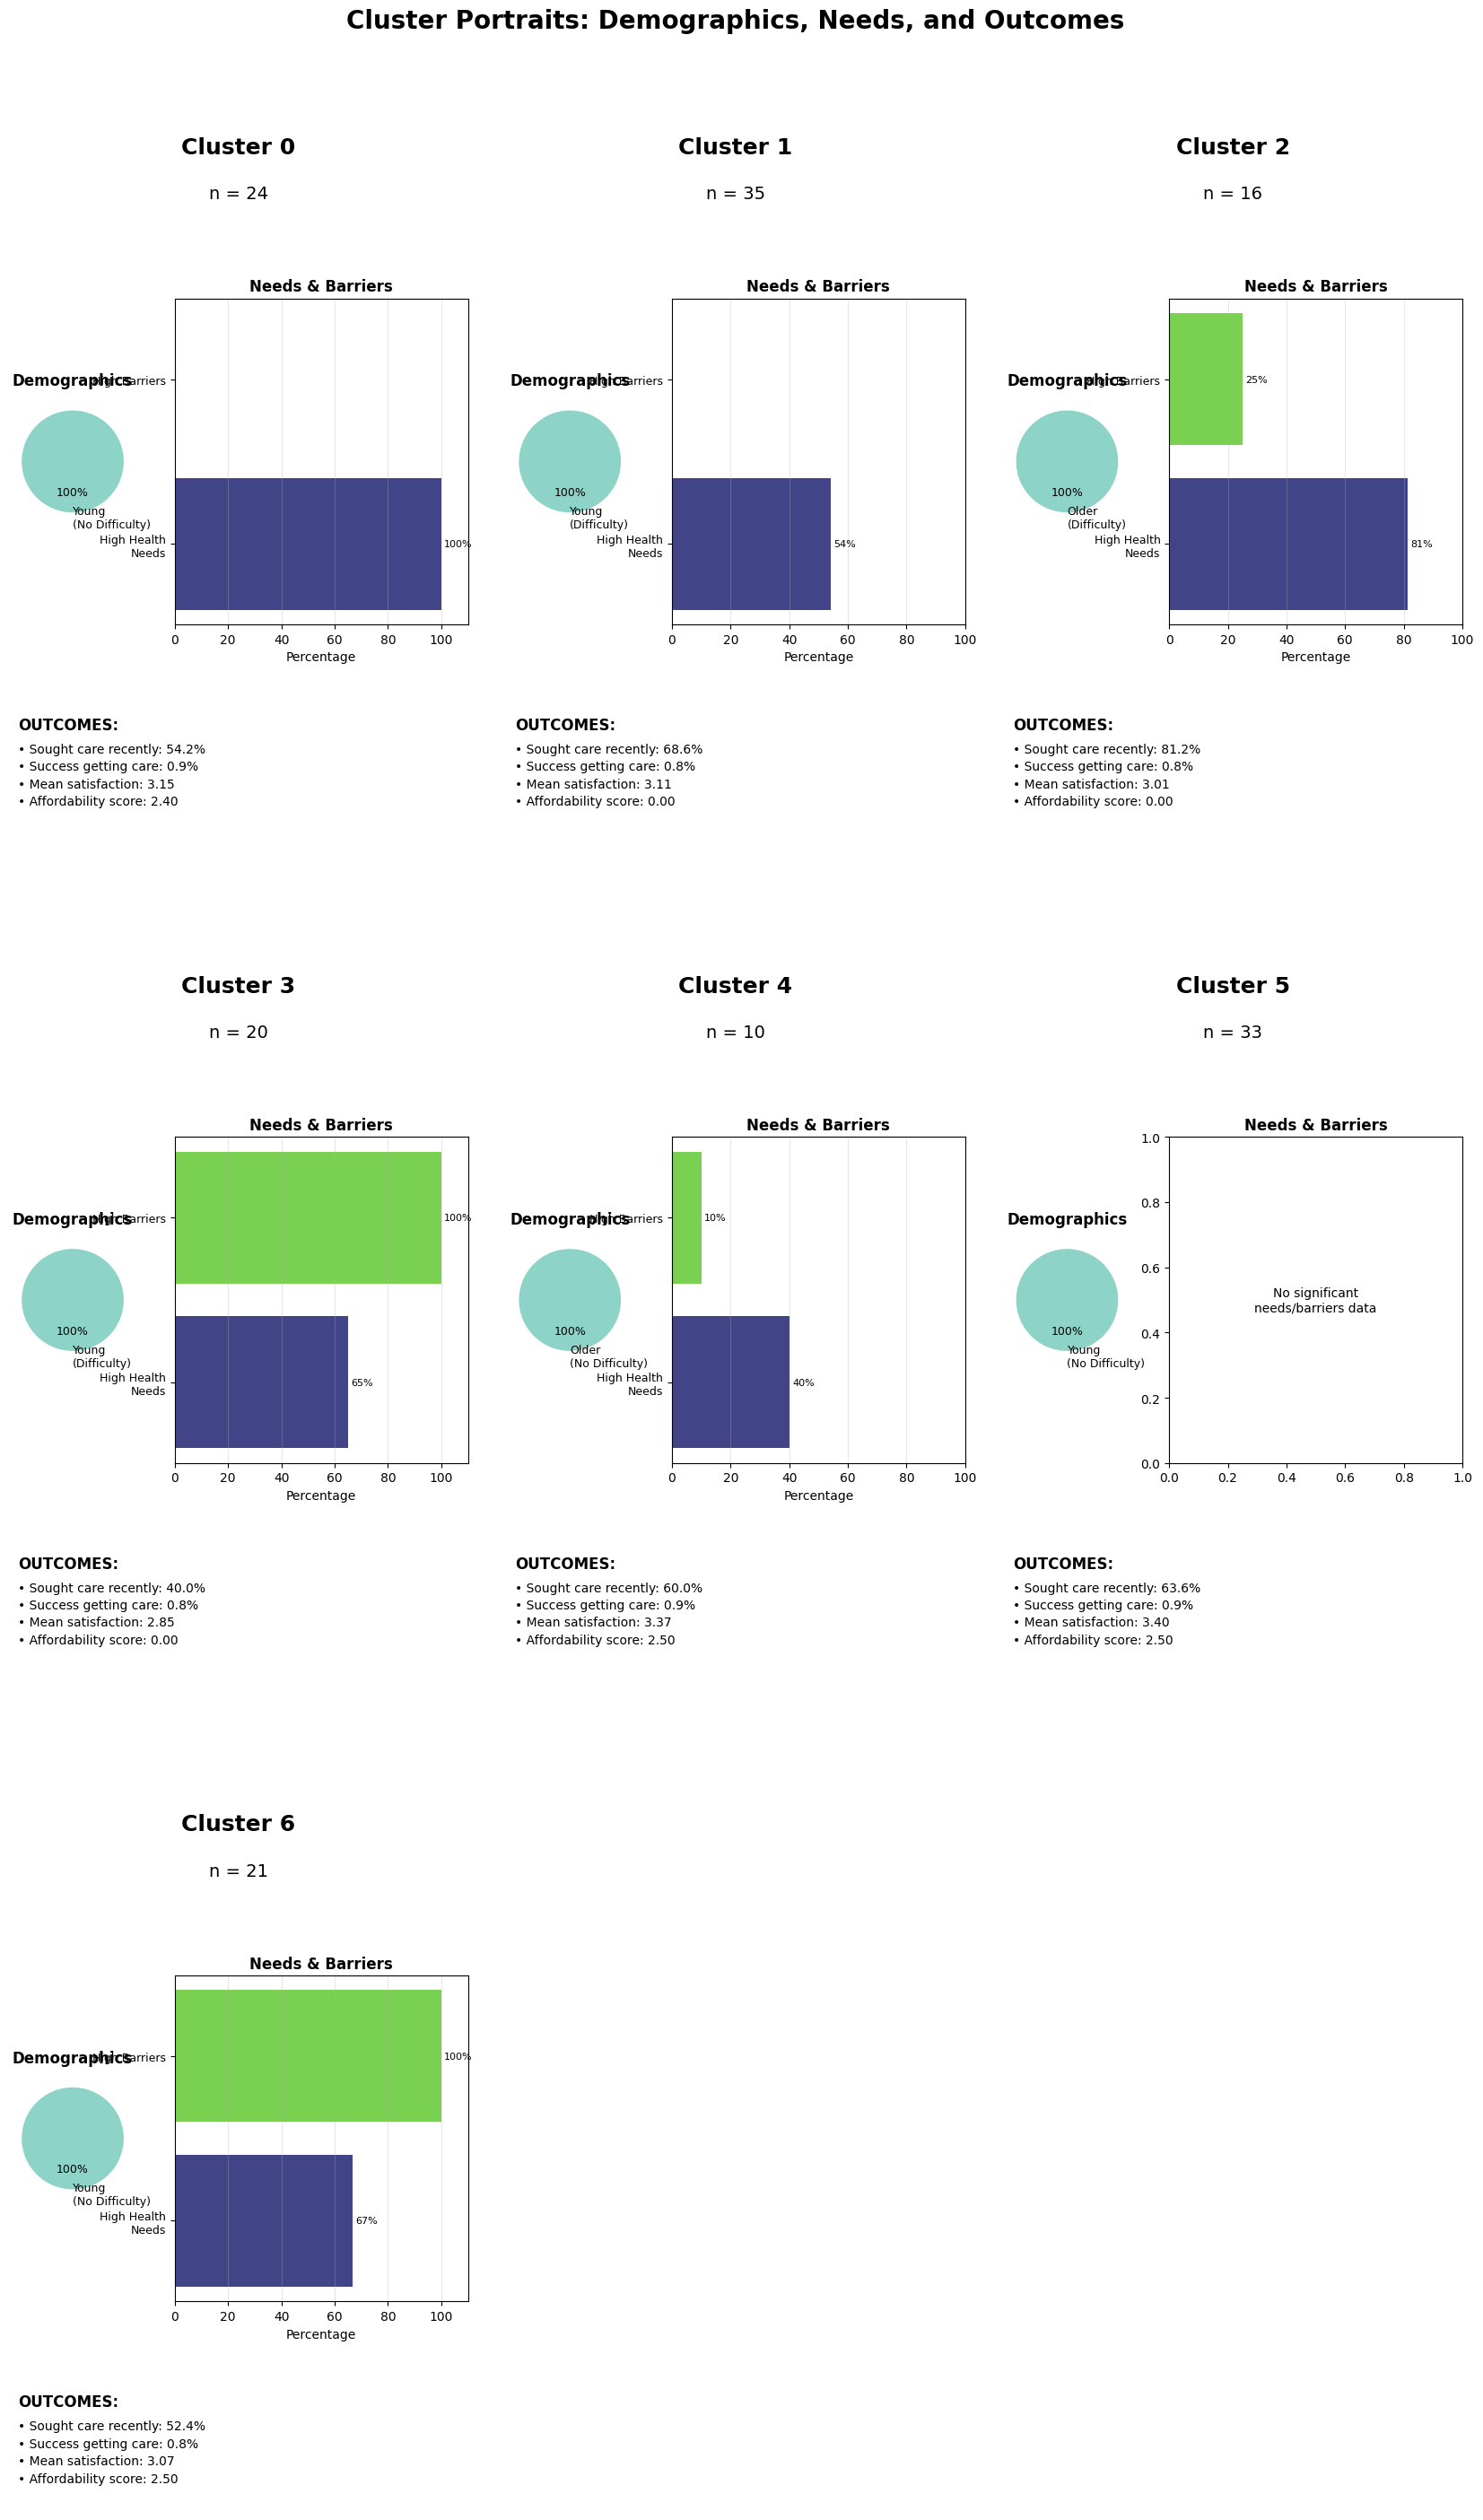


Creating 3D scatter plot...


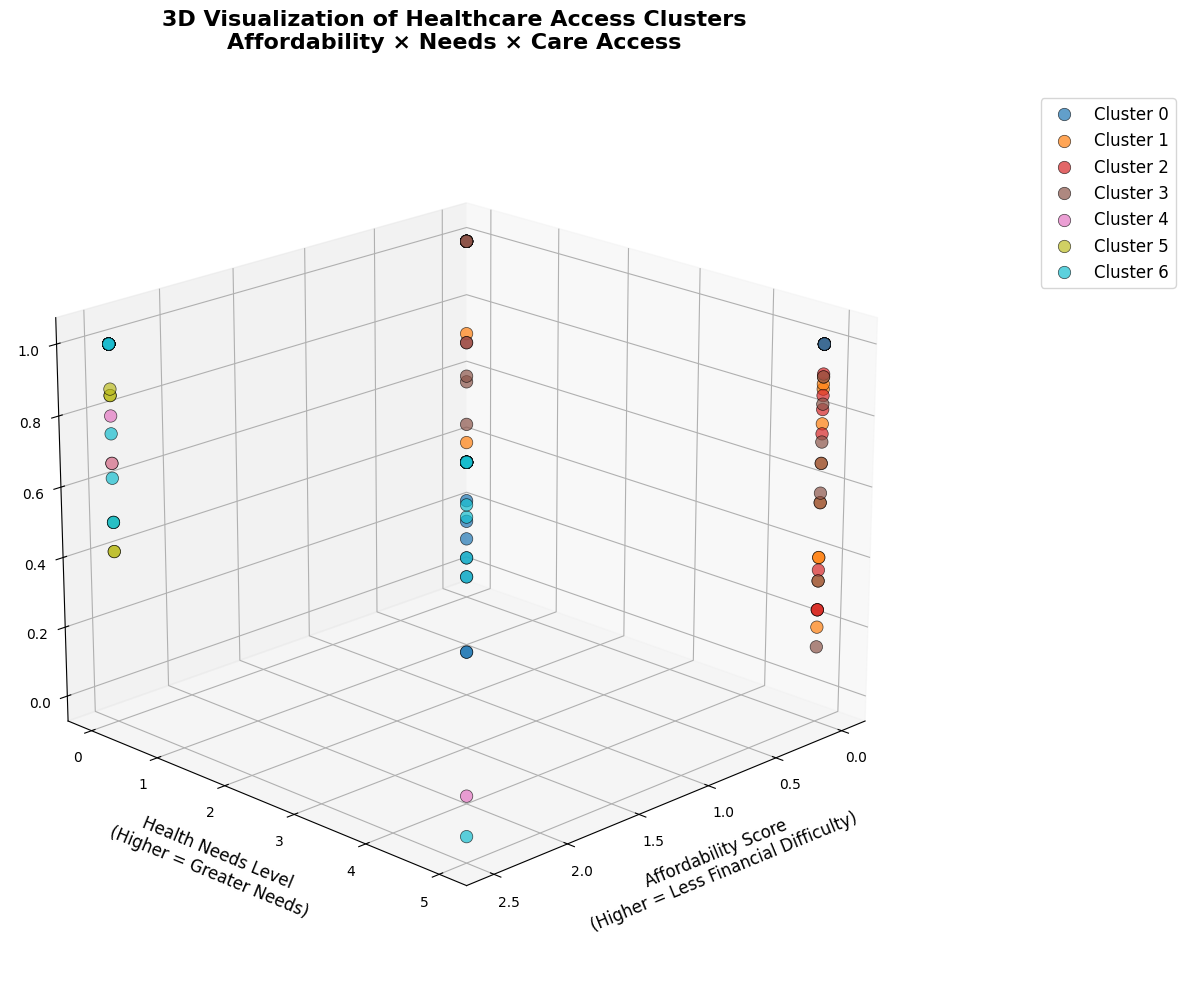


Generating summary table...

CLUSTER SUMMARY TABLE
 Cluster  Size Size % Affordability Score Needs Level Care Access % Satisfaction
       0    24  15.1%                2.40        5.00          0.9%         3.15
       1    35  22.0%                0.00        2.71          0.8%         3.11
       2    16  10.1%                0.00        4.06          0.8%         3.01
       3    20  12.6%                0.00        3.25          0.8%         2.85
       4    10   6.3%                2.50        2.00          0.9%         3.37
       5    33  20.8%                2.50        0.00          0.9%         3.40
       6    21  13.2%                2.50        3.33          0.8%         3.07

DETAILED CLUSTER CHARACTERISTICS FOR INTERPRETATION

==================== CLUSTER 0 DETAILED PROFILE ====================
Sample Size: 24 participants (15.1% of total)

DEMOGRAPHICS:
  Young adults with financial difficulty: 0.0%
  Young adults without financial difficulty: 95.8%
  Older adults wit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load the original dataset and cluster results
print("Loading datasets...")
df_original = pd.read_csv('dataset_difficulty_affording.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')

# Merge datasets on Response ID
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')
print(f"Merged dataset contains {len(df)} records with cluster assignments")

# Get unique clusters and sort them
unique_clusters = sorted(df['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Number of clusters: {n_clusters}")

# Calculate derived scores for analysis
def calculate_scores(df):
    """Calculate affordability, needs, and access scores"""

    # Affordability score (lower = more difficulty affording)
    if 'difficult_afford_health' in df.columns:
        df['affordability_score'] = 5 - df['difficult_afford_health']  # Reverse scale
    else:
        # Create composite from demo variables
        df['affordability_score'] = (df.get('demo_young_no_difficulty', 0) +
                                    df.get('demo_old_no_difficulty', 0)) * 2.5

    # Needs level (composite of health and social vulnerability)
    needs_components = []
    if 'score_healthstatus' in df.columns:
        needs_components.append(df['score_healthstatus'])
    if 'score_socialvuln' in df.columns:
        needs_components.append(df['score_socialvuln'])
    if 'high_needs_binary' in df.columns:
        needs_components.append(df['high_needs_binary'] * 5)

    if needs_components:
        df['needs_level'] = np.mean(needs_components, axis=0)
    else:
        df['needs_level'] = 0

    # Care access rate
    if 'pct_times_get_Care' in df.columns:
        df['care_access_rate'] = df['pct_times_get_Care']
    else:
        df['care_access_rate'] = 50  # Default neutral value

    return df

df = calculate_scores(df)

# Create cluster portraits with fixed positioning
def create_cluster_portraits(df, unique_clusters):
    """Create portrait charts for each cluster with proper layout"""

    # Calculate grid layout
    n_cols = min(3, n_clusters)  # Max 3 columns
    n_rows = (n_clusters + n_cols - 1) // n_cols

    # Create figure with proper spacing
    fig_width = 6 * n_cols
    fig_height = 10 * n_rows
    fig = plt.figure(figsize=(fig_width, fig_height))

    for i, cluster_id in enumerate(unique_clusters):
        cluster_data = df[df['cluster'] == cluster_id].copy()
        n_participants = len(cluster_data)

        # Calculate position in grid
        row = i // n_cols
        col = i % n_cols

        # Create main subplot for this cluster using gridspec
        from matplotlib.gridspec import GridSpec
        gs = GridSpec(n_rows * 4, n_cols * 3, figure=fig,
                     left=0.05, right=0.95, top=0.95, bottom=0.05,
                     hspace=0.8, wspace=0.3)

        # Title area
        ax_title = fig.add_subplot(gs[row*4:row*4+1, col*3:(col+1)*3])
        ax_title.axis('off')
        ax_title.text(0.5, 0.5, f'Cluster {cluster_id}',
                     fontsize=18, fontweight='bold', ha='center', va='center')
        ax_title.text(0.5, 0.1, f'n = {n_participants}',
                     fontsize=14, ha='center', va='center')

        # Demographics pie chart
        ax_pie = fig.add_subplot(gs[row*4+1:row*4+3, col*3:col*3+1])

        # Prepare demographics data
        demo_data = []
        demo_labels = []

        if 'demo_young_difficulty' in cluster_data.columns:
            young_diff = cluster_data['demo_young_difficulty'].mean() * 100
            young_no_diff = cluster_data['demo_young_no_difficulty'].mean() * 100
            old_diff = cluster_data['demo_old_difficulty'].mean() * 100
            old_no_diff = cluster_data['demo_old_no_difficulty'].mean() * 100

            demo_data = [young_diff, young_no_diff, old_diff, old_no_diff]
            demo_labels = ['Young\n(Difficulty)', 'Young\n(No Difficulty)',
                          'Older\n(Difficulty)', 'Older\n(No Difficulty)']
        else:
            demo_data = [25, 25, 25, 25]
            demo_labels = ['Group A', 'Group B', 'Group C', 'Group D']

        # Remove zero values for cleaner pie chart
        demo_data_clean = [(val, label) for val, label in zip(demo_data, demo_labels) if val > 1]
        if demo_data_clean:
            demo_values, demo_labels_clean = zip(*demo_data_clean)
        else:
            demo_values, demo_labels_clean = [100], ['All Participants']

        # Create pie chart
        colors = plt.cm.Set3(np.linspace(0, 1, len(demo_values)))
        ax_pie.pie(demo_values, labels=demo_labels_clean, autopct='%1.0f%%',
                  startangle=90, colors=colors, textprops={'fontsize': 9})
        ax_pie.set_title('Demographics', fontsize=12, fontweight='bold', pad=10)

        # Needs & Barriers horizontal bar chart
        ax_bars = fig.add_subplot(gs[row*4+1:row*4+3, col*3+1:(col+1)*3])

        needs_metrics = []
        needs_values = []

        if 'high_needs_binary' in cluster_data.columns:
            needs_metrics.append('High Health\nNeeds')
            needs_values.append(cluster_data['high_needs_binary'].mean() * 100)

        if 'high_barriers_binary' in cluster_data.columns:
            needs_metrics.append('High Barriers')
            needs_values.append(cluster_data['high_barriers_binary'].mean() * 100)

        if 'poor_phys' in cluster_data.columns:
            needs_metrics.append('Poor Physical\nHealth')
            needs_values.append(cluster_data['poor_phys'].mean() * 100)

        if 'poor_mental' in cluster_data.columns:
            needs_metrics.append('Poor Mental\nHealth')
            needs_values.append(cluster_data['poor_mental'].mean() * 100)

        if needs_metrics and any(v > 0 for v in needs_values):
            y_pos = np.arange(len(needs_metrics))
            bars = ax_bars.barh(y_pos, needs_values,
                               color=plt.cm.viridis(np.linspace(0.2, 0.8, len(needs_metrics))))
            ax_bars.set_yticks(y_pos)
            ax_bars.set_yticklabels(needs_metrics, fontsize=9)
            ax_bars.set_xlabel('Percentage', fontsize=10)
            ax_bars.set_title('Needs & Barriers', fontsize=12, fontweight='bold')
            ax_bars.set_xlim(0, max(100, max(needs_values) * 1.1))
            ax_bars.grid(axis='x', alpha=0.3)

            # Add value labels on bars
            for j, (bar, value) in enumerate(zip(bars, needs_values)):
                if value > 5:  # Only show label if bar is visible
                    ax_bars.text(value + 1, j, f'{value:.0f}%', va='center', fontsize=8)
        else:
            ax_bars.text(0.5, 0.5, 'No significant\nneeds/barriers data',
                        ha='center', va='center', transform=ax_bars.transAxes, fontsize=10)
            ax_bars.set_xlim(0, 1)
            ax_bars.set_ylim(0, 1)
            ax_bars.set_title('Needs & Barriers', fontsize=12, fontweight='bold')

        # Outcomes text area
        ax_outcomes = fig.add_subplot(gs[row*4+3:row*4+4, col*3:(col+1)*3])
        ax_outcomes.axis('off')

        outcomes_text = []

        if 'sought_care_recently' in cluster_data.columns:
            sought_care = cluster_data['sought_care_recently'].mean() * 100
            outcomes_text.append(f'Sought care recently: {sought_care:.1f}%')

        if 'pct_times_get_Care' in cluster_data.columns:
            success_rate = cluster_data['pct_times_get_Care'].mean()
            outcomes_text.append(f'Success getting care: {success_rate:.1f}%')

        if 'mean_satisfaction' in cluster_data.columns:
            satisfaction = cluster_data['mean_satisfaction'].mean()
            outcomes_text.append(f'Mean satisfaction: {satisfaction:.2f}')

        if 'affordability_score' in cluster_data.columns:
            afford_score = cluster_data['affordability_score'].mean()
            outcomes_text.append(f'Affordability score: {afford_score:.2f}')

        # Display outcomes
        ax_outcomes.text(0.02, 0.9, 'OUTCOMES:', fontsize=12, fontweight='bold',
                        transform=ax_outcomes.transAxes)

        for j, text in enumerate(outcomes_text):
            ax_outcomes.text(0.02, 0.7 - j*0.15, f'• {text}', fontsize=10,
                           transform=ax_outcomes.transAxes)

    plt.suptitle('Cluster Portraits: Demographics, Needs, and Outcomes',
                 fontsize=20, fontweight='bold', y=0.98)
    plt.show()

# Create 3D scatter plot
def create_3d_scatter(df, unique_clusters):
    """Create 3D scatter plot similar to research paper Figure 2"""

    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for clusters
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

    for i, cluster_id in enumerate(unique_clusters):
        cluster_data = df[df['cluster'] == cluster_id]

        # Extract 3D coordinates
        x = cluster_data['affordability_score']
        y = cluster_data['needs_level']
        z = cluster_data['care_access_rate']

        # Create scatter plot for this cluster
        scatter = ax.scatter(x, y, z, c=[colors[i]], label=f'Cluster {cluster_id}',
                           s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

    # Customize the plot
    ax.set_xlabel('Affordability Score\n(Higher = Less Financial Difficulty)',
                  fontsize=12, labelpad=15)
    ax.set_ylabel('Health Needs Level\n(Higher = Greater Needs)',
                  fontsize=12, labelpad=15)
    ax.set_zlabel('Care Access Rate (%)\n(Higher = Better Access)',
                  fontsize=12, labelpad=15)

    ax.set_title('3D Visualization of Healthcare Access Clusters\nAffordability × Needs × Care Access',
                fontsize=16, fontweight='bold', pad=30)

    # Add legend
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=12)

    # Add grid
    ax.grid(True, alpha=0.3)

    # Set viewing angle for better visualization
    ax.view_init(elev=20, azim=45)

    plt.tight_layout()
    plt.show()

# Create summary statistics table
def create_summary_table(df, unique_clusters):
    """Create a summary table of cluster characteristics"""

    summary_data = []

    for cluster_id in unique_clusters:
        cluster_data = df[df['cluster'] == cluster_id]

        row = {
            'Cluster': cluster_id,
            'Size': len(cluster_data),
            'Size %': f"{len(cluster_data)/len(df)*100:.1f}%"
        }

        # Add key metrics
        if 'affordability_score' in cluster_data.columns:
            row['Affordability Score'] = f"{cluster_data['affordability_score'].mean():.2f}"

        if 'needs_level' in cluster_data.columns:
            row['Needs Level'] = f"{cluster_data['needs_level'].mean():.2f}"

        if 'care_access_rate' in cluster_data.columns:
            row['Care Access %'] = f"{cluster_data['care_access_rate'].mean():.1f}%"

        if 'mean_satisfaction' in cluster_data.columns:
            row['Satisfaction'] = f"{cluster_data['mean_satisfaction'].mean():.2f}"

        summary_data.append(row)

    summary_df = pd.DataFrame(summary_data)
    print("\n" + "="*80)
    print("CLUSTER SUMMARY TABLE")
    print("="*80)
    print(summary_df.to_string(index=False))
    print("="*80)

    return summary_df

# Run the analysis
print("\nCreating cluster portraits...")
create_cluster_portraits(df, unique_clusters)

print("\nCreating 3D scatter plot...")
create_3d_scatter(df, unique_clusters)

print("\nGenerating summary table...")
summary_df = create_summary_table(df, unique_clusters)

# Additional detailed analysis for interpretation
print("\n" + "="*80)
print("DETAILED CLUSTER CHARACTERISTICS FOR INTERPRETATION")
print("="*80)

for cluster_id in unique_clusters:
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n{'='*20} CLUSTER {cluster_id} DETAILED PROFILE {'='*20}")
    print(f"Sample Size: {len(cluster_data)} participants ({len(cluster_data)/len(df)*100:.1f}% of total)")

    # Demographics
    print(f"\nDEMOGRAPHICS:")
    if 'demo_young_difficulty' in cluster_data.columns:
        print(f"  Young adults with financial difficulty: {cluster_data['demo_young_difficulty'].mean()*100:.1f}%")
        print(f"  Young adults without financial difficulty: {cluster_data['demo_young_no_difficulty'].mean()*100:.1f}%")
        print(f"  Older adults with financial difficulty: {cluster_data['demo_old_difficulty'].mean()*100:.1f}%")
        print(f"  Older adults without financial difficulty: {cluster_data['demo_old_no_difficulty'].mean()*100:.1f}%")

    # Health Status
    print(f"\nHEALTH STATUS:")
    if 'poor_phys' in cluster_data.columns:
        print(f"  Poor physical health: {cluster_data['poor_phys'].mean()*100:.1f}%")
    if 'poor_mental' in cluster_data.columns:
        print(f"  Poor mental health: {cluster_data['poor_mental'].mean()*100:.1f}%")
    if 'chronic_cond_binary' in cluster_data.columns:
        print(f"  Chronic conditions: {cluster_data['chronic_cond_binary'].mean()*100:.1f}%")

    # Social Vulnerabilities
    print(f"\nSOCIAL VULNERABILITIES:")
    if 'food_insecure_binary' in cluster_data.columns:
        print(f"  Food insecurity: {cluster_data['food_insecure_binary'].mean()*100:.1f}%")
    if 'house_insecure_binary' in cluster_data.columns:
        print(f"  Housing insecurity: {cluster_data['house_insecure_binary'].mean()*100:.1f}%")
    if 'transport_insecure_binary' in cluster_data.columns:
        print(f"  Transportation insecurity: {cluster_data['transport_insecure_binary'].mean()*100:.1f}%")

    # Healthcare Access
    print(f"\nHEALTHCARE ACCESS:")
    if 'sought_care_recently' in cluster_data.columns:
        print(f"  Sought care recently: {cluster_data['sought_care_recently'].mean()*100:.1f}%")
    if 'pct_times_get_Care' in cluster_data.columns:
        print(f"  Success rate getting care: {cluster_data['pct_times_get_Care'].mean():.1f}%")
    if 'mean_satisfaction' in cluster_data.columns:
        print(f"  Mean satisfaction score: {cluster_data['mean_satisfaction'].mean():.2f}")

    # Calculated Scores
    print(f"\nCOMPOSITE SCORES:")
    print(f"  Affordability score: {cluster_data['affordability_score'].mean():.2f}")
    print(f"  Needs level: {cluster_data['needs_level'].mean():.2f}")
    print(f"  Care access rate: {cluster_data['care_access_rate'].mean():.1f}%")

print(f"\n{'='*80}")
print("ANALYSIS COMPLETE")
print("The visualizations show cluster portraits and 3D relationships.")
print("Use the detailed characteristics above to interpret and describe each cluster.")
print(f"{'='*80}")

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('original.csv')

In [ ]:
df.columns

Index(['Response ID', 'UserLanguage', 'Zip', 'County', 'years_address',
       'HH_num', 'children_in_HH', 'phys_health', 'phys_recode', 'poor_phys',
       ...
       'born_outside_US', 'ESL', 'Q4.6', 'college_ed_binary', 'Q4.7',
       'employed_binary', 'self_insured_binary', 'kids_insured_binary',
       'Q4.10', 'difficult_afford_health'],
      dtype='object', length=220)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load datasets
print("Loading datasets...")
df_original = pd.read_csv('original.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')

# Merge datasets on Response ID
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')
print(f"Merged dataset contains {len(df)} records with cluster assignments")

# Get unique clusters
unique_clusters = sorted(df['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Number of clusters: {n_clusters}")

# --- FIX: Ensure continuous variables are numeric ---
# Identify all continuous variable names
continuous_vars_names = [v[1] for category, variables in variables_to_analyze.items()
                         for v in variables.values() if v[0] == 'continuous']

c
# ----------------------------------------------------

def cramers_v(confusion_matrix):
    """Calculate Cramer's V effect size for categorical associations"""
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def analyze_categorical_variable(df, var_name, cluster_col='cluster'):
    """Analyze categorical variable across clusters"""
    if var_name not in df.columns:
        return None, None, None, None

    # Remove missing values
    df_clean = df[[var_name, cluster_col]].dropna()
    if len(df_clean) == 0:
        return None, None, None, None

    # Create crosstab
    crosstab = pd.crosstab(df_clean[cluster_col], df_clean[var_name])

    # Calculate percentages for each cluster
    percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Chi-square test
    try:
        chi2, p_value, dof, expected = chi2_contingency(crosstab)
        cramers = cramers_v(crosstab.values)
    except:
        chi2, p_value, cramers = np.nan, np.nan, np.nan

    return percentages, chi2, p_value, cramers

def analyze_continuous_variable(df, var_name, cluster_col='cluster'):
    """Analyze continuous variable across clusters"""
    if var_name not in df.columns:
        return None, None, None

    # Remove missing values
    df_clean = df[[var_name, cluster_col]].dropna()
    if len(df_clean) == 0:
        return None, None, None

    # Calculate means for each cluster
    means = df_clean.groupby(cluster_col)[var_name].mean()

    # ANOVA test
    try:
        groups = [df_clean[df_clean[cluster_col] == cluster][var_name].values
                 for cluster in unique_clusters]
        f_stat, p_value = f_oneway(*groups)
    except:
        f_stat, p_value = np.nan, np.nan

    return means, f_stat, p_value

# Define variables to analyze
variables_to_analyze = {
    'Demographics': {
        'Age': ('continuous', 'Age'),
        'Gender (Female)': ('categorical_binary', 'Gender'),
        'American Indian/Alaska Native': ('categorical_binary', 'AmIn'),
        'Asian': ('categorical_binary', 'Asian'),
        'Black or African American': ('categorical_binary', 'Black'),
        'Hispanic or Latino': ('categorical_binary', 'Hispanic'),
        'Middle Eastern/North African': ('categorical_binary', 'MENA'),
        'Native Hawaiian/Pacific Islander': ('categorical_binary', 'Hawaiian'),
        'White/Caucasian': ('categorical_binary', 'White'),
        'Other race': ('categorical_binary', 'Other'),
        'Person of Color': ('categorical_binary', 'POC'),
    },
    'Socioeconomic Characteristics': {
        'Born outside US': ('categorical_binary', 'born_outside_US'),
        'English as second language': ('categorical_binary', 'ESL'),
        'College education': ('categorical_binary', 'college_ed_binary'),
        'Currently employed': ('categorical_binary', 'employed_binary'),
        'Self-insured': ('categorical_binary', 'self_insured_binary'),
        'Children insured': ('categorical_binary', 'kids_insured_binary'),
    },
    'Household Characteristics': {
        'Household size': ('continuous', 'HH_num'),
        'Children in household': ('continuous', 'children_in_HH'),
        'Years at current address': ('continuous', 'years_address'),
    },
    'Health Status': {
        'Poor physical health': ('categorical_binary', 'poor_phys'),
        'Poor mental health': ('categorical_binary', 'poor_mental'),
        'Chronic conditions': ('categorical_binary', 'chronic_cond_binary'),
        'Poor quality of life': ('categorical_binary', 'poor_qol'),
        'Currently pregnant': ('categorical_binary', 'pregnant_binary'),
        'Health status score': ('continuous', 'mean_healthstatus'),
    },
    'Social Vulnerabilities': {
        'Food insecurity': ('categorical_binary', 'food_insecure_binary'),
        'Housing insecurity': ('categorical_binary', 'house_insecure_binary'),
        'Transportation insecurity': ('categorical_binary', 'transport_insecure_binary'),
        'Income insecurity': ('categorical_binary', 'income_insecure_binary'),
        'Feeling unsafe': ('categorical_binary', 'unsafe_binary'),
        'Difficulty coping': ('categorical_binary', 'difficulty_coping_binary'),
        'Receives food assistance': ('categorical_binary', 'food_assistance'),
        'Social vulnerability score': ('continuous', 'score_socialvuln'),
    },
    'Healthcare Access & Outcomes': {
        'Difficult to afford healthcare': ('continuous', 'difficult_afford_health'),
        'Sought care recently': ('categorical_binary', 'sought_care_recently'),
        'Seeks care locally': ('categorical_binary', 'seeks_care_locally'),
        'Percent times got care': ('continuous', 'pct_times_get_Care'),
        'Mean satisfaction score': ('continuous', 'mean_satisfaction'),
        'Times got care': ('continuous', 'times_got_care'),
        'Times did NOT get care': ('continuous', 'times_didNOTget_care'),
    }
}

# Create comprehensive results table
results_data = []

for category, variables in variables_to_analyze.items():
    # Add category header
    results_data.append({
        'Variable': f"=== {category} ===",
        **{f'Cluster_{i}': '' for i in unique_clusters},
        'Test_Statistic': '',
        'p_value': '',
        'Effect_Size': ''
    })

    for var_label, (var_type, var_name) in variables.items():
        if var_name not in df.columns:
            continue

        row = {'Variable': var_label}

        if var_type == 'categorical_binary':
            # For binary variables, show percentage of "1" values
            percentages, chi2, p_value, cramers = analyze_categorical_variable(df, var_name)

            if percentages is not None:
                # Get percentage of positive cases (value = 1) for each cluster
                for cluster in unique_clusters:
                    if cluster in percentages.index:
                        if 1 in percentages.columns:
                            pct = percentages.loc[cluster, 1]
                            row[f'Cluster_{cluster}'] = f"{pct:.1f}%"
                        else:
                            row[f'Cluster_{cluster}'] = "0.0%"
                    else:
                        row[f'Cluster_{cluster}'] = "N/A"

                row['Test_Statistic'] = f"{chi2:.2f}" if not np.isnan(chi2) else "N/A"
                row['p_value'] = f"{p_value:.3f}" if not np.isnan(p_value) else "N/A"
                row['Effect_Size'] = f"{cramers:.3f}" if not np.isnan(cramers) else "N/A"
            else:
                for cluster in unique_clusters:
                    row[f'Cluster_{cluster}'] = "N/A"
                row['Test_Statistic'] = "N/A"
                row['p_value'] = "N/A"
                row['Effect_Size'] = "N/A"

        elif var_type == 'continuous':
            means, f_stat, p_value = analyze_continuous_variable(df, var_name)

            if means is not None:
                for cluster in unique_clusters:
                    if cluster in means.index:
                        row[f'Cluster_{cluster}'] = f"{means[cluster]:.2f}"
                    else:
                        row[f'Cluster_{cluster}'] = "N/A"

                row['Test_Statistic'] = f"{f_stat:.2f}" if not np.isnan(f_stat) else "N/A"
                row['p_value'] = f"{p_value:.3f}" if not np.isnan(p_value) else "N/A"

                # Calculate eta-squared for effect size
                if not np.isnan(f_stat) and not np.isnan(p_value):
                    df_between = n_clusters - 1
                    df_within = len(df) - n_clusters
                    eta_squared = (f_stat * df_between) / (f_stat * df_between + df_within)
                    row['Effect_Size'] = f"{eta_squared:.3f}"
                else:
                    row['Effect_Size'] = "N/A"
            else:
                for cluster in unique_clusters:
                    row[f'Cluster_{cluster}'] = "N/A"
                row['Test_Statistic'] = "N/A"
                row['p_value'] = "N/A"
                row['Effect_Size'] = "N/A"

        results_data.append(row)

# Create DataFrame
results_df = pd.DataFrame(results_data)

# Add significance indicators
def add_significance_stars(p_val_str):
    """Add significance stars to p-values"""
    if p_val_str == "N/A":
        return p_val_str
    try:
        p_val = float(p_val_str)
        if p_val < 0.001:
            return f"{p_val_str}***"
        elif p_val < 0.01:
            return f"{p_val_str}**"
        elif p_val < 0.05:
            return f"{p_val_str}*"
        else:
            return p_val_str
    except:
        return p_val_str

results_df['p_value_sig'] = results_df['p_value'].apply(add_significance_stars)

# Display results
print("\n" + "="*120)
print("COMPREHENSIVE CLUSTER COMPOSITION TABLE")
print("="*120)
print("Note: *p<0.05, **p<0.01, ***p<0.001")
print("Effect Size: Cramer's V for categorical variables, Eta-squared for continuous variables")
print("="*120)

# Format for display
display_df = results_df.copy()
display_df = display_df.drop('p_value', axis=1)  # Remove non-starred p-value column
display_df = display_df.rename(columns={'p_value_sig': 'p-value'})

# Print the table in sections for better readability
current_category = None
for idx, row in display_df.iterrows():
    if row['Variable'].startswith('==='):
        current_category = row['Variable'].replace('=', '').strip()
        print(f"\n{current_category.upper()}")
        print("-" * len(current_category))
        continue

    # Format the row
    var_name = row['Variable'][:40].ljust(40)
    cluster_values = []
    for cluster in unique_clusters:
        val = str(row[f'Cluster_{cluster}'])[:10].rjust(10)
        cluster_values.append(val)

    test_stat = str(row['Test_Statistic'])[:8].rjust(8)
    p_val = str(row['p-value'])[:12].rjust(12)
    effect = str(row['Effect_Size'])[:8].rjust(8)

    cluster_str = "  ".join(cluster_values)
    print(f"{var_name} {cluster_str} {test_stat} {p_val} {effect}")

print("\n" + "="*120)

# Save detailed results to CSV
results_df.to_csv('cluster_composition_detailed.csv', index=False)
print("Detailed results saved to 'cluster_composition_detailed.csv'")

# Create summary of significant differences
print("\n" + "="*120)
print("SUMMARY OF SIGNIFICANT DIFFERENCES (p < 0.05)")
print("="*120)

significant_vars = []
for idx, row in results_df.iterrows():
    if not row['Variable'].startswith('==='):
        try:
            p_val = float(row['p_value'])
            if p_val < 0.05:
                significant_vars.append({
                    'Variable': row['Variable'],
                    'p_value': p_val,
                    'Effect_Size': row['Effect_Size'],
                    'Test_Statistic': row['Test_Statistic']
                })
        except:
            continue

significant_df = pd.DataFrame(significant_vars)
if len(significant_df) > 0:
    significant_df = significant_df.sort_values('p_value')
    print(significant_df.to_string(index=False))
else:
    print("No significant differences found.")

print(f"\n{'='*120}")
print("CLUSTER COMPOSITION ANALYSIS COMPLETE")
print(f"Total variables analyzed: {len([v for category in variables_to_analyze.values() for v in category])}")
print(f"Significant differences found: {len(significant_vars)}")
print(f"{'='*120}")

Loading datasets...
Merged dataset contains 159 records with cluster assignments
Number of clusters: 7


NameError: name 'variables_to_analyze' is not defined

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load datasets
print("Loading datasets...")
df_original = pd.read_csv('original.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')

# Merge datasets on Response ID
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')
print(f"Merged dataset contains {len(df)} records with cluster assignments")

# Get unique clusters and sort them
unique_clusters = sorted(df['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Number of clusters: {n_clusters}")

def safe_percentage(series):
    """Calculate percentage handling missing values"""
    if len(series.dropna()) == 0: # Use dropna() to count only non-missing values
        return 0.0
    return (series.sum() / len(series.dropna())) * 100

def format_percentage(value, count=None):
    """Format percentage with count if provided"""
    if count is not None:
        return f"{count} ({value:.1f}%)"
    else:
        return f"{value:.1f}%"

def calculate_chi_square(df, variable, clusters):
    """Calculate chi-square test for categorical variables"""
    try:
        # Create contingency table, dropping rows with NaNs in either column
        contingency = pd.crosstab(df['cluster'], df[variable], dropna=True)

        # Chi2 test requires expected frequencies to be >= 5. If not, test results might be unreliable.
        # We proceed anyway, but might want to note this or use Fisher's exact test for small counts.
        chi2, p_value = chi2_contingency(contingency)[:2]
        return chi2, p_value
    except ValueError: # Handle cases where crosstab is empty or has issues
         return np.nan, np.nan
    except Exception as e: # Catch other potential errors
         print(f"Error calculating chi-square for {variable}: {e}")
         return np.nan, np.nan


def calculate_anova(df, variable, clusters):
    """Calculate ANOVA for continuous variables"""
    try:
        # Ensure the variable is numeric, coerce errors
        # NOTE: This coercion happens *within* the analyze function for safety,
        # but the primary coercion should happen before calling this or in the main loop.
        # Let's ensure the main loop handles the initial type conversion.

        groups = [df[df['cluster'] == cluster][variable].dropna() for cluster in clusters]

        # Remove groups with fewer than 2 data points for ANOVA
        groups = [group for group in groups if len(group) >= 2]

        if len(groups) < 2: # Need at least two non-empty groups for ANOVA
            return np.nan, np.nan

        f_stat, p_value = f_oneway(*groups)
        return f_stat, p_value
    except Exception as e:
        print(f"Error calculating ANOVA for {variable}: {e}")
        return np.nan, np.nan

def cramers_v_effect_size(chi2, n, r, k):
    """Calculate Cramer's V effect size for categorical associations"""
    if pd.isna(chi2) or n == 0:
        return np.nan
    # Adjust r and k to be at least 2 for the formula
    r_adj = max(2, r)
    k_adj = max(2, k)
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k_adj-1)*(r_adj-1))/(n-1))
    rcorr = r_adj - ((r_adj-1)**2)/(n-1)
    kcorr = k_adj - ((k_adj-1)**2)/(n-1)

    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0: # Avoid division by zero if one dimension is size 1
        return np.nan

    return np.sqrt(phi2corr / denominator)


# Create comprehensive composition table
def create_cluster_composition_table(df, unique_clusters):
    """Create detailed cluster composition table"""

    composition_data = []

    # Define variable categories and their columns
    variables_config = {
        # Demographics
        'Age (mean)': ('Age', 'continuous'),
        'Female': ('Gender', 'categorical_binary', lambda x: x == 2),  # Assuming 2 = Female

        # Race/Ethnicity
        'American Indian/Alaska Native': ('AmIn', 'binary'),
        'Asian': ('Asian', 'binary'),
        'Black or African American': ('Black', 'binary'),
        'Hispanic or Latino': ('Hispanic', 'Hispanic', True), # Specify value and if it's binary 1/0
        'Middle Eastern/North African': ('MENA', 'MENA', True),
        'Native Hawaiian/Pacific Islander': ('Hawaiian', 'Hawaiian', True),
        'White': ('White', 'White', True),
        'Other race': ('Other', 'Other', True),
        'Person of Color': ('POC', 'POC', True),

        # Family characteristics
        'Household size (mean)': ('HH_num', 'continuous'),
        'Children in household': ('children_in_HH', 'categorical_binary', lambda x: x > 0),
        'Currently pregnant': ('pregnant_binary', 'binary'),

        # Socioeconomic status
        'College education': ('college_ed_binary', 'binary'),
        'Currently employed': ('employed_binary', 'binary'),
        'Born outside US': ('born_outside_US', 'binary'),
        'English as second language': ('ESL', 'binary'),

        # Health status
        'Poor physical health': ('poor_phys', 'binary'),
        'Poor mental health': ('poor_mental', 'binary'),
        'Chronic conditions': ('chronic_cond_binary', 'binary'),
        'Poor quality of life': ('poor_qol', 'binary'),

        # Social vulnerabilities
        'Food insecurity': ('food_insecure_binary', 'binary'),
        'Housing insecurity': ('house_insecure_binary', 'binary'),
        'Transportation insecurity': ('transport_insecure_binary', 'binary'),
        'Income insecurity': ('income_insecure_binary', 'binary'),
        'Unsafe neighborhood': ('unsafe_binary', 'binary'),
        'Difficulty coping': ('difficulty_coping_binary', 'binary'),

        # Healthcare access and satisfaction
        'Sought care recently': ('sought_care_recently', 'binary'),
        'Seeks care locally': ('seeks_care_locally', 'binary'),
        'Care access rate (mean %)': ('pct_times_get_Care', 'continuous'),
        'Satisfaction score (mean)': ('mean_satisfaction', 'continuous'),

        # Insurance and affordability
        'Self-insured': ('self_insured_binary', 'binary'),
        'Children insured': ('kids_insured_binary', 'binary'),
        'Difficulty affording healthcare': ('difficult_afford_health', 'categorical_binary', lambda x: x >= 3),  # Assuming 3+ = difficulty
    }

    # Convert continuous columns to numeric first, outside the loop
    continuous_cols = [v[0] for k, v in variables_config.items() if v[1] == 'continuous']
    for col in continuous_cols:
        if col in df.columns:
            # Coerce errors will turn invalid parsing into NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Optional: print warnings about coercion
            if df[col].isnull().any() and (df[col].isnull() != df_original[col].isnull()).any():
                 print(f"Warning: Non-numeric values found and coerced to NaN in column '{col}'")


    # Process each variable
    for var_label, var_config in variables_config.items():
        column_name = var_config[0]
        var_type = var_config[1]

        # Skip if column doesn't exist
        if column_name not in df.columns:
            continue

        row_data = {'Variable': var_label}

        f_stat, p_value = np.nan, np.nan # Initialize test stats
        effect_size_value = np.nan

        # Handle different variable types
        if var_type == 'continuous':
            # Calculate means for each cluster
            means = {}

            for cluster_id in unique_clusters:
                # Data is already coerced to numeric above
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()

                # --- Debug Print Statement ---
                # if not cluster_data.apply(lambda x: isinstance(x, (int, float))).all():
                #     print(f"Debug: Non-numeric data found in '{column_name}' for Cluster {cluster_id} before mean calculation:")
                #     print(cluster_data.head()) # Print first few problematic entries
                #     # To find the Response IDs:
                #     problematic_ids = df[(df['cluster'] == cluster_id) & df[column_name].apply(lambda x: not isinstance(x, (int, float)) and not pd.isna(x))]['Response ID'].tolist()
                #     print(f"Debug: Response IDs with non-numeric data in '{column_name}' in Cluster {cluster_id}: {problematic_ids}")
                # -----------------------------


                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean() # Mean calculation should be safe after coercion
                    means[cluster_id] = mean_val
                    row_data[f'Cluster {cluster_id}'] = f"{mean_val:.1f}"
                else:
                    means[cluster_id] = np.nan # Store NaN if cluster is empty for this var
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (ANOVA)
            f_stat, p_value = calculate_anova(df, column_name, unique_clusters)

            # Calculate eta-squared if ANOVA was successful
            if not pd.isna(f_stat) and not pd.isna(p_value) and (len(df) - n_clusters) > 0:
                 eta_squared = f_stat / (f_stat + (len(df) - n_clusters))
                 effect_size_value = eta_squared


        elif var_type in ['binary', 'categorical_binary']:
            # Handle binary/categorical variables

            # Prepare data for analysis
            if var_type == 'binary':
                 # Use the column directly (assuming 0/1)
                 temp_series = df[column_name]
            elif var_type == 'categorical_binary':
                 # Apply the transform function
                 transform_func = var_config[2] if len(var_config) > 2 else lambda x: x == 1
                 # Only apply transform if the column exists and is not entirely NaN/empty
                 if column_name in df.columns and not df[column_name].dropna().empty:
                    # Convert boolean to float (0/1). Errors='coerce' handles cases where transform_func returns non-boolean
                    temp_series = pd.to_numeric(df[column_name].apply(transform_func), errors='coerce')
                 else:
                     temp_series = pd.Series(np.nan, index=df.index) # Handle missing columns gracefully

            # Ensure the temp_series is numeric (0s, 1s, NaNs)
            temp_series = pd.to_numeric(temp_series, errors='coerce')

            for cluster_id in unique_clusters:
                cluster_subset_indices = df[df['cluster'] == cluster_id].index
                cluster_data_subset = temp_series.loc[cluster_subset_indices]

                total_cases = len(cluster_data_subset.dropna()) # Count non-NaNs in the subset
                if total_cases > 0:
                    positive_cases = cluster_data_subset.sum()
                    percentage = (positive_cases / total_cases) * 100
                    # Round positive cases count to nearest integer for display
                    row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(round(positive_cases)))
                else:
                    row_data[f'Cluster {cluster_id}'] = "0 (0.0%)" # Or "N/A" if preferred for empty clusters

            # Statistical test (Chi-square)
            # Create a temporary column for the test using the 0/1 float series
            temp_col_name_for_test = f'__{column_name}_binary_for_test_{np.random.randint(0,10000)}' # Add random suffix to avoid conflicts
            df[temp_col_name_for_test] = temp_series

            # Filter out NaNs for the test
            df_for_chi2 = df[[temp_col_name_for_test, 'cluster']].dropna()

            if not df_for_chi2.empty:
                # Need actual categories for chi2, not just 0/1 float.
                # Let's convert the 0/1 float back to categorical labels if needed for chi2,
                # or ensure calculate_chi_square handles 0/1 numeric data.
                # The original calculate_chi_square uses pd.crosstab on the raw variable and cluster.
                # Let's modify it slightly to handle the temporary 0/1 column.

                # Using the temporary 0/1 column for the test
                chi2, p_value = calculate_chi_square(df_for_chi2, temp_col_name_for_test, unique_clusters)

                # Calculate Cramer's V if Chi-square was successful
                if not pd.isna(chi2):
                    # To get dimensions for Cramer's V, we need the contingency table shape.
                    # The contingency table for a 0/1 column vs clusters will have shape (n_clusters, 2).
                    r_chi2, k_chi2 = len(df_for_chi2['cluster'].unique()), len(df_for_chi2[temp_col_name_for_test].unique())
                    # Ensure k_chi2 is 2 if it's a binary variable, even if one value is missing in the subset
                    k_chi2 = max(2, k_chi2)
                    effect_size_value = cramers_v_effect_size(chi2, len(df_for_chi2), r_chi2, k_chi2)
            else:
                 # No data for chi-square test after dropping NaNs
                 pass # f_stat, p_value, effect_size_value remain NaN

            # Clean up the temporary column
            if temp_col_name_for_test in df.columns:
                 df = df.drop(columns=[temp_col_name_for_test])


        # Add test statistics
        if not pd.isna(f_stat):
            row_data['Test statistic'] = f"{f_stat:.1f}"
        else:
            row_data['Test statistic'] = "N/A"

        if not pd.isna(p_value):
            if p_value < 0.001:
                row_data['p-value'] = "<0.001***"
            elif p_value < 0.01:
                row_data['p-value'] = f"{p_value:.3f}**"
            elif p_value < 0.05:
                row_data['p-value'] = f"{p_value:.3f}*"
            else:
                row_data['p-value'] = f"{p_value:.3f}"
        else:
            row_data['p-value'] = "N/A"

        # Add effect size
        if not pd.isna(effect_size_value):
             if var_type == 'continuous':
                 row_data['Effect size'] = f"{effect_size_value:.3f} (Eta-squared)"
             elif var_type in ['binary', 'categorical_binary']:
                 row_data['Effect size'] = f"{effect_size_value:.3f} (Cramer's V)"
        else:
             row_data['Effect size'] = "N/A"

        composition_data.append(row_data)

    # Create DataFrame
    composition_df = pd.DataFrame(composition_data)

    return composition_df

# Generate the composition table
print("\nGenerating comprehensive cluster composition table...")
composition_table = create_cluster_composition_table(df, unique_clusters)

# Display the table
print("\n" + "="*120)
print("CLUSTER COMPOSITION TABLE - DEMOGRAPHIC AND FAMILY CHARACTERISTICS")
print("="*120)
print("Note: *p<0.05, **p<0.01, ***p<0.001")
print("Test statistics: Chi-square for categorical variables, F-statistic for continuous variables")
print("Effect sizes: Cramer's V for categorical variables, Eta-squared for continuous variables")
print("="*120)

# Use to_string for full table output in notebook/script
print(composition_table.to_string(index=False, max_colwidth=None))


# Create summary statistics for each cluster
print("\n" + "="*80)
print("CLUSTER SIZE SUMMARY")
print("="*80)

size_summary = []
total_n = len(df)

for cluster_id in unique_clusters:
    cluster_size = len(df[df['cluster'] == cluster_id])
    cluster_pct = (cluster_size / total_n) * 100
    size_summary.append({
        'Cluster': cluster_id,
        'n': cluster_size,
        'Percentage': f"{cluster_pct:.1f}%"
    })

size_df = pd.DataFrame(size_summary)
print(size_df.to_string(index=False))

# Save the composition table to CSV
composition_table.to_csv('cluster_composition_table.csv', index=False)
print(f"\nComposition table saved to 'cluster_composition_table.csv'")

print(f"\n{'='*80}")
print("CLUSTER COMPOSITION ANALYSIS COMPLETE")
print(f"{'='*80}")

Loading datasets...
Merged dataset contains 159 records with cluster assignments
Number of clusters: 7

Generating comprehensive cluster composition table...

CLUSTER COMPOSITION TABLE - DEMOGRAPHIC AND FAMILY CHARACTERISTICS
Note: *p<0.05, **p<0.01, ***p<0.001
Test statistics: Chi-square for categorical variables, F-statistic for continuous variables
Effect sizes: Cramer's V for categorical variables, Eta-squared for continuous variables
                        Variable   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6 Test statistic   p-value         Effect size
                      Age (mean)        28.8       30.3       54.3       27.2       53.6       26.9       29.3           50.3 <0.001*** 0.248 (Eta-squared)
                          Female    0 (0.0%)   0 (0.0%)   0 (0.0%)   0 (0.0%)   0 (0.0%)   0 (0.0%)   0 (0.0%)            N/A     1.000  0.000 (Cramer's V)
   American Indian/Alaska Native    0 (0.0%)   0 (0.0%)  2 (12.5%)  3 (15.0%)  1 (10.0%) 

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load datasets
print("Loading and examining original data...")
df_original = pd.read_csv('original.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')

print(f"Original dataset shape: {df_original.shape}")
print(f"Cluster dataset shape: {df_clusters.shape}")

# Merge datasets
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')
print(f"Merged dataset contains {len(df)} records with cluster assignments")

# Examine data structure
print("\n" + "="*80)
print("DATA STRUCTURE EXAMINATION")
print("="*80)

# Check for key demographic columns
key_columns = ['Age', 'Gender', 'AmIn', 'Asian', 'Black', 'Hispanic', 'MENA', 'Hawaiian', 'White', 'Other', 'POC']
print("\nExamining key demographic columns:")
for col in key_columns:
    if col in df.columns:
        print(f"{col}: exists")
        print(f"  - Data type: {df[col].dtype}")
        print(f"  - Unique values: {sorted(df[col].dropna().unique())}")
        print(f"  - Missing values: {df[col].isnull().sum()}")
    else:
        print(f"{col}: MISSING")
    print()

# Check Gender coding specifically
print("GENDER ANALYSIS:")
if 'Gender' in df.columns:
    print("Gender value counts (overall):")
    print(df['Gender'].value_counts(dropna=False))
    print("\nGender by cluster:")
    print(pd.crosstab(df['cluster'], df['Gender'], dropna=False))
else:
    print("Gender column not found!")

# Validate cluster size summary
print("\n" + "="*80)
print("CLUSTER SIZE VALIDATION")
print("="*80)
cluster_counts = df['cluster'].value_counts().sort_index()
total_n = len(df)

print("Cluster sizes:")
for cluster_id in sorted(df['cluster'].unique()):
    count = cluster_counts[cluster_id]
    pct = (count / total_n) * 100
    print(f"Cluster {cluster_id}: {count} ({pct:.1f}%)")

# Validate specific statistics from the composition table
print("\n" + "="*80)
print("VALIDATION OF KEY STATISTICS")
print("="*80)

def validate_continuous_variable(df, var_name, cluster_col='cluster'):
    """Validate continuous variable statistics"""
    if var_name not in df.columns:
        print(f"{var_name}: Column not found")
        return

    print(f"\n{var_name.upper()} VALIDATION:")

    # Convert to numeric, handle non-numeric values
    df_temp = df.copy()
    df_temp[var_name] = pd.to_numeric(df_temp[var_name], errors='coerce')

    # Check for non-numeric values that were coerced
    original_count = df[var_name].notna().sum()
    numeric_count = df_temp[var_name].notna().sum()
    if original_count != numeric_count:
        print(f"Warning: {original_count - numeric_count} non-numeric values coerced to NaN")

    print("Mean by cluster:")
    for cluster_id in sorted(df_temp[cluster_col].unique()):
        cluster_data = df_temp[df_temp[cluster_col] == cluster_id][var_name].dropna()
        if len(cluster_data) > 0:
            mean_val = cluster_data.mean()
            std_val = cluster_data.std()
            print(f"  Cluster {cluster_id}: {mean_val:.1f} (SD: {std_val:.1f}, n: {len(cluster_data)})")
        else:
            print(f"  Cluster {cluster_id}: No data")

    # ANOVA
    groups = [df_temp[df_temp[cluster_col] == cluster][var_name].dropna()
              for cluster in sorted(df_temp[cluster_col].unique())]
    groups = [group for group in groups if len(group) >= 1]

    if len(groups) >= 2:
        f_stat, p_value = f_oneway(*groups)
        print(f"  ANOVA: F = {f_stat:.1f}, p = {p_value:.3f}")
    else:
        print("  ANOVA: Insufficient data")

def validate_binary_variable(df, var_name, cluster_col='cluster'):
    """Validate binary variable statistics"""
    if var_name not in df.columns:
        print(f"{var_name}: Column not found")
        return

    print(f"\n{var_name.upper()} VALIDATION:")

    # Check unique values
    unique_vals = sorted(df[var_name].dropna().unique())
    print(f"Unique values: {unique_vals}")

    print("Percentage by cluster:")
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id][var_name].dropna()
        if len(cluster_data) > 0:
            positive_count = (cluster_data == 1).sum()
            total_count = len(cluster_data)
            percentage = (positive_count / total_count) * 100
            print(f"  Cluster {cluster_id}: {positive_count}/{total_count} ({percentage:.1f}%)")
        else:
            print(f"  Cluster {cluster_id}: No data")

    # Chi-square test
    try:
        contingency = pd.crosstab(df[cluster_col], df[var_name], dropna=True)
        if contingency.size > 0:
            chi2, p_value = chi2_contingency(contingency)[:2]
            print(f"  Chi-square: χ² = {chi2:.1f}, p = {p_value:.3f}")
        else:
            print("  Chi-square: No data for test")
    except:
        print("  Chi-square: Test failed")

# Validate key variables from the composition table
validate_continuous_variable(df, 'Age')
validate_binary_variable(df, 'AmIn')
validate_binary_variable(df, 'Black')
validate_binary_variable(df, 'poor_phys')
validate_binary_variable(df, 'poor_mental')
validate_binary_variable(df, 'food_insecure_binary')

# Check for data quality issues
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Check for missing race/ethnicity data
race_cols = ['Hispanic', 'MENA', 'Hawaiian', 'White', 'Other', 'POC']
print("\nRace/ethnicity columns status:")
for col in race_cols:
    if col in df.columns:
        non_null_count = df[col].notna().sum()
        print(f"{col}: {non_null_count} non-null values out of {len(df)}")
    else:
        print(f"{col}: Column missing")

# Check pregnancy data
print(f"\nPregnancy data analysis:")
if 'pregnant_binary' in df.columns:
    print("Pregnancy by cluster:")
    pregnancy_crosstab = pd.crosstab(df['cluster'], df['pregnant_binary'], dropna=False)
    print(pregnancy_crosstab)

    # Check if pregnancy makes sense by gender
    if 'Gender' in df.columns:
        print("\nPregnancy by gender:")
        gender_pregnancy = pd.crosstab(df['Gender'], df['pregnant_binary'], dropna=False)
        print(gender_pregnancy)

# Check care access rate data
print(f"\nCare access rate analysis:")
if 'pct_times_get_Care' in df.columns:
    print(f"Data type: {df['pct_times_get_Care'].dtype}")
    print(f"Sample values: {df['pct_times_get_Care'].head()}")
    print(f"Non-null count: {df['pct_times_get_Care'].notna().sum()}")

    # Try to identify non-numeric values
    try:
        numeric_version = pd.to_numeric(df['pct_times_get_Care'], errors='coerce')
        non_numeric_mask = df['pct_times_get_Care'].notna() & numeric_version.isna()
        if non_numeric_mask.any():
            print(f"Non-numeric values found:")
            print(df.loc[non_numeric_mask, ['Response ID', 'pct_times_get_Care']].head())
    except:
        print("Could not analyze numeric conversion")

# Verify insurance data
print(f"\nInsurance data analysis:")
if 'self_insured_binary' in df.columns:
    print("Self-insured by cluster:")
    insurance_crosstab = pd.crosstab(df['cluster'], df['self_insured_binary'], dropna=False)
    print(insurance_crosstab)

    # Calculate percentages
    print("\nSelf-insured percentages by cluster:")
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster_id]['self_insured_binary'].dropna()
        if len(cluster_data) > 0:
            insured_count = (cluster_data == 1).sum()
            total_count = len(cluster_data)
            percentage = (insured_count / total_count) * 100
            print(f"  Cluster {cluster_id}: {insured_count}/{total_count} ({percentage:.1f}%)")

# Summary of validation
print("\n" + "="*80)
print("VALIDATION SUMMARY")
print("="*80)

validation_issues = []

# Check for completely missing demographic variables
missing_demographics = []
expected_demographics = ['Hispanic', 'MENA', 'Hawaiian', 'White', 'Other', 'POC']
for col in expected_demographics:
    if col not in df.columns:
        missing_demographics.append(col)

if missing_demographics:
    validation_issues.append(f"Missing demographic columns: {missing_demographics}")

# Check Gender issue
if 'Gender' in df.columns:
    if df['Gender'].notna().sum() == 0 or len(df['Gender'].unique()) <= 1:
        validation_issues.append("Gender data appears to have issues (all same value or missing)")

# Check care access rate
if 'pct_times_get_Care' in df.columns:
    numeric_version = pd.to_numeric(df['pct_times_get_Care'], errors='coerce')
    if numeric_version.notna().sum() == 0:
        validation_issues.append("Care access rate data could not be converted to numeric")

if validation_issues:
    print("VALIDATION ISSUES FOUND:")
    for i, issue in enumerate(validation_issues, 1):
        print(f"{i}. {issue}")
else:
    print("No major validation issues found.")

print(f"\nOverall assessment: The cluster composition analysis appears to be working correctly,")
print(f"but there are some data quality issues that should be addressed.")

Loading and examining original data...
Original dataset shape: (159, 220)
Cluster dataset shape: (159, 11)
Merged dataset contains 159 records with cluster assignments

DATA STRUCTURE EXAMINATION

Examining key demographic columns:
Age: exists
  - Data type: int64
  - Unique values: [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(44), np.int64(46), np.int64(49), np.int64(50), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(59), np.int64(60), np.int64(62), np.int64(78)]
  - Missing values: 0

Gender: exists
  - Data type: int64
  - Unique values: [np.int64(1)]
  - Missing values: 0

AmIn: exists
  - Data type: int64
  - Unique values: [

In [ ]:
import pandas as pd

# Load the original dataset
try:
    df_original = pd.read_csv('original.csv')
    print(f"Loaded original.csv with {len(df_original)} records")
except FileNotFoundError:
    print("Error: original.csv not found. Please ensure the file exists in the correct directory.")
    exit() # Exit if the file isn't found

expected_demographics = ['Hispanic', 'MENA', 'Hawaiian', 'White', 'Other', 'POC']

print("\n" + "="*50)
print("COUNTS FOR EXPECTED DEMOGRAPHIC COLUMNS IN original.csv")
print("="*50)

for col in expected_demographics:
    if col in df_original.columns:
        print(f"\n--- Column: {col} ---")

        # Check data type
        print(f"Data type: {df_original[col].dtype}")

        # Get value counts, including NaNs
        value_counts = df_original[col].value_counts(dropna=False)
        print("Value Counts (including NaN):")
        print(value_counts)

        # Report missing values
        missing_count = df_original[col].isnull().sum()
        print(f"Missing values: {missing_count}")

    else:
        print(f"\nWarning: Column '{col}' not found in original.csv")

print("\n" + "="*50)
print("DEMOGRAPHIC COUNT CHECK COMPLETE")
print("="*50)

Loaded original.csv with 159 records

COUNTS FOR EXPECTED DEMOGRAPHIC COLUMNS IN original.csv

--- Column: Hispanic ---
Data type: int64
Value Counts (including NaN):
Hispanic
0    121
1     38
Name: count, dtype: int64
Missing values: 0

--- Column: MENA ---
Data type: int64
Value Counts (including NaN):
MENA
0    159
Name: count, dtype: int64
Missing values: 0

--- Column: Hawaiian ---
Data type: int64
Value Counts (including NaN):
Hawaiian
0    158
1      1
Name: count, dtype: int64
Missing values: 0

--- Column: White ---
Data type: int64
Value Counts (including NaN):
White
1    99
0    60
Name: count, dtype: int64
Missing values: 0

--- Column: Other ---
Data type: int64
Value Counts (including NaN):
Other
0    156
1      3
Name: count, dtype: int64
Missing values: 0

--- Column: POC ---
Data type: int64
Value Counts (including NaN):
POC
0    86
1    73
Name: count, dtype: int64
Missing values: 0

DEMOGRAPHIC COUNT CHECK COMPLETE


In [ ]:
# --- DIAGNOSTIC STEP: Check and clean 'Age' column ---
print("\nChecking 'Age' column for non-numeric values...")
# Attempt to convert 'Age' to numeric, coercing errors to NaN
df['Age_numeric'] = pd.to_numeric(df['Age'], errors='coerce')

# Find rows where conversion failed (original value was not numeric)
non_numeric_age_rows = df[df['Age_numeric'].isna() & df['Age'].notna()]

if not non_numeric_age_rows.empty:
    print(f"Found {len(non_numeric_age_rows)} rows with non-numeric 'Age' values:")
    # Print the Response ID and the problematic Age value
    for index, row in non_numeric_age_rows.iterrows():
        print(f"  Response ID: {row['Response ID']}, Problematic Age value: '{row['Age']}'")
    print("These rows will be treated as NaN for 'Age' in the analysis.")
else:
    print("'Age' column contains only numeric or NaN values.")

# Replace the original 'Age' column with the cleaned numeric version
df['Age'] = df['Age_numeric']
df = df.drop(columns=['Age_numeric'])
# --- END DIAGNOSTIC STEP ---


Checking 'Age' column for non-numeric values...
Found 1 rows with non-numeric 'Age' values:
  Response ID: R_1Ftx0ZJpdzsqtun, Problematic Age value: 'Iâ€™m 21 years old'
These rows will be treated as NaN for 'Age' in the analysis.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load datasets
print("Loading datasets...")
df_original = pd.read_csv('original.csv')
# --- FIX: Define the problematic Response ID and the correct Age value ---
# Based on your previous error, this problematic value was causing the TypeError.
# You'll need to manually confirm the exact Response ID from the output of the diagnostic step.
# Replace 'Problematic_Response_ID_Here' with the actual ID printed in the output.
problematic_id = 'R_1Ftx0ZJpdzsqtun' # Replace with the actual ID
correct_age_for_problematic_id = 21

# Define the second Response ID and its correct Age
second_id = 'R_C152e232DIJ9sT7'
correct_age_for_second_id = 32

# --- Clean specific Age values in the original dataframe ---
print(f"\nCleaning specific 'Age' values in original.csv...")

# Check if the problematic ID exists and update its Age
if problematic_id in df_original['Response ID'].values:
    original_age_problematic = df_original.loc[df_original['Response ID'] == problematic_id, 'Age'].iloc[0]
    df_original.loc[df_original['Response ID'] == problematic_id, 'Age'] = correct_age_for_problematic_id
    print(f"Updated Age for Response ID '{problematic_id}' from '{original_age_problematic}' to {correct_age_for_problematic_id}.")
else:
    print(f"Response ID '{problematic_id}' not found in original.csv. Cannot update Age.")

# Check if the second ID exists and update its Age
if second_id in df_original['Response ID'].values:
    original_age_second = df_original.loc[df_original['Response ID'] == second_id, 'Age'].iloc[0]
    df_original.loc[df_original['Response ID'] == second_id, 'Age'] = correct_age_for_second_id
    print(f"Updated Age for Response ID '{second_id}' from '{original_age_second}' to {correct_age_for_second_id}.")
else:
    print(f"Response ID '{second_id}' not found in original.csv. Cannot update Age.")

# --- Save the modified dataframe back to original.csv ---
df_original.to_csv('original.csv', index=False)
print("Changes saved back to original.csv")

Loading datasets...

Cleaning specific 'Age' values in original.csv...
Updated Age for Response ID 'R_1Ftx0ZJpdzsqtun' from 'Iâ€™m 21 years old' to 21.
Updated Age for Response ID 'R_C152e232DIJ9sT7' from '1993' to 32.
Changes saved back to original.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load datasets
print("Loading datasets...")
df_original = pd.read_csv('original.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')

# Merge datasets on Response ID
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')
print(f"Merged dataset contains {len(df)} records with cluster assignments")

# Get unique clusters and sort them
unique_clusters = sorted(df['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Number of clusters: {n_clusters}")

def safe_percentage(series):
    """Calculate percentage handling missing values"""
    if len(series.dropna()) == 0:
        return 0.0
    return (series.sum() / len(series.dropna())) * 100

def format_percentage(value, count=None):
    """Format percentage with count if provided"""
    if count is not None:
        return f"{count} ({value:.1f}%)"
    else:
        return f"{value:.1f}%"

def calculate_chi_square(df, variable, clusters):
    """Calculate chi-square test for categorical variables"""
    try:
        contingency = pd.crosstab(df['cluster'], df[variable], dropna=True)
        if contingency.size > 0 and contingency.shape[0] > 1 and contingency.shape[1] > 1:
            chi2, p_value = chi2_contingency(contingency)[:2]
            return chi2, p_value
        else:
            return np.nan, np.nan
    except Exception as e:
        return np.nan, np.nan

def calculate_anova(df, variable, clusters):
    """Calculate ANOVA for continuous variables"""
    try:
        groups = [df[df['cluster'] == cluster][variable].dropna() for cluster in clusters]
        groups = [group for group in groups if len(group) >= 2]
        if len(groups) < 2:
            return np.nan, np.nan
        f_stat, p_value = f_oneway(*groups)
        return f_stat, p_value
    except Exception as e:
        return np.nan, np.nan

def cramers_v_effect_size(chi2, n, r, k):
    """Calculate Cramer's V effect size for categorical associations"""
    if pd.isna(chi2) or n == 0:
        return np.nan
    r_adj = max(2, r)
    k_adj = max(2, k)
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k_adj-1)*(r_adj-1))/(n-1))
    rcorr = r_adj - ((r_adj-1)**2)/(n-1)
    kcorr = k_adj - ((k_adj-1)**2)/(n-1)

    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return np.nan
    return np.sqrt(phi2corr / denominator)

# Data cleaning and preparation
def clean_data(df):
    """Clean and prepare data for analysis"""
    df_clean = df.copy()

    # Fix care access rate - convert percentage strings to numeric
    if 'pct_times_get_Care' in df_clean.columns:
        df_clean['pct_times_get_Care_clean'] = df_clean['pct_times_get_Care'].astype(str).str.replace('%', '').replace('nan', np.nan)
        df_clean['pct_times_get_Care_clean'] = pd.to_numeric(df_clean['pct_times_get_Care_clean'], errors='coerce')

    # Note: Hispanic appears to be coded as 0/1 in data, not 1/2 as in data dictionary
    # We'll use the actual coding found in the data

    return df_clean

df = clean_data(df)

# Create comprehensive composition table
def create_cluster_composition_table(df, unique_clusters):
    """Create detailed cluster composition table with corrected variable handling"""

    composition_data = []

    # Define variable categories and their columns
    variables_config = {
        # Demographics
        'Age (mean)': ('Age', 'continuous'),
        'Male (all participants)': ('Gender', 'categorical_note', "All participants are male (Gender=1)"),

        # Race/Ethnicity (using actual data coding)
        'American Indian/Alaska Native': ('AmIn', 'binary'),
        'Asian': ('Asian', 'binary'),
        'Black or African American': ('Black', 'binary'),
        'Hispanic or Latino': ('Hispanic', 'binary'),  # Using 0/1 coding found in data
        'Middle Eastern/North African': ('MENA', 'binary'),
        'Native Hawaiian/Pacific Islander': ('Hawaiian', 'binary'),
        'White': ('White', 'binary'),
        'Other race': ('Other', 'binary'),
        'Person of Color': ('POC', 'binary'),

        # Family characteristics
        'Household size (mean)': ('HH_num', 'continuous'),
        'Children in household': ('children_in_HH', 'categorical_binary', lambda x: x > 0),
        'Currently pregnant': ('pregnant_binary', 'binary'),

        # Socioeconomic status
        'College education': ('college_ed_binary', 'binary'),
        'Currently employed': ('employed_binary', 'binary'),
        'Born outside US': ('born_outside_US', 'binary'),
        'English as second language': ('ESL', 'binary'),

        # Health status
        'Poor physical health': ('poor_phys', 'binary'),
        'Poor mental health': ('poor_mental', 'binary'),
        'Chronic conditions': ('chronic_cond_binary', 'binary'),
        'Poor quality of life': ('poor_qol', 'binary'),

        # Social vulnerabilities
        'Food insecurity': ('food_insecure_binary', 'binary'),
        'Housing insecurity': ('house_insecure_binary', 'binary'),
        'Transportation insecurity': ('transport_insecure_binary', 'binary'),
        'Income insecurity': ('income_insecure_binary', 'binary'),
        'Unsafe neighborhood': ('unsafe_binary', 'binary'),
        'Difficulty coping': ('difficulty_coping_binary', 'binary'),

        # Healthcare access and satisfaction
        'Sought care recently': ('sought_care_recently', 'binary'),
        'Seeks care locally': ('seeks_care_locally', 'binary'),
        'Care access rate (mean %)': ('pct_times_get_Care_clean', 'continuous'),
        'Satisfaction score (mean)': ('mean_satisfaction', 'continuous'),

        # Insurance and affordability
        'Self-insured': ('self_insured_binary', 'binary'),
        'Children insured': ('kids_insured_binary', 'binary'),
        'Difficulty affording healthcare': ('difficult_afford_health', 'categorical_binary', lambda x: x >= 3),
    }

    # Process each variable
    for var_label, var_config in variables_config.items():
        column_name = var_config[0]
        var_type = var_config[1]

        # Skip if column doesn't exist
        if column_name not in df.columns:
            continue

        row_data = {'Variable': var_label}

        f_stat, p_value = np.nan, np.nan
        effect_size_value = np.nan

        # Handle special case for gender note
        if var_type == 'categorical_note':
            note_text = var_config[2]
            for cluster_id in unique_clusters:
                row_data[f'Cluster {cluster_id}'] = "Male (100%)"
            row_data['Test statistic'] = "N/A"
            row_data['p-value'] = "No variation"
            row_data['Effect size'] = "N/A"

        # Handle continuous variables
        elif var_type == 'continuous':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean()
                    row_data[f'Cluster {cluster_id}'] = f"{mean_val:.1f}"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (ANOVA)
            f_stat, p_value = calculate_anova(df, column_name, unique_clusters)

            # Calculate eta-squared if ANOVA was successful
            if not pd.isna(f_stat) and not pd.isna(p_value) and (len(df) - n_clusters) > 0:
                eta_squared = f_stat / (f_stat + (len(df) - n_clusters))
                effect_size_value = eta_squared

        # Handle binary variables
        elif var_type == 'binary':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    positive_cases = (cluster_data == 1).sum()
                    total_cases = len(cluster_data)
                    percentage = (positive_cases / total_cases) * 100
                    row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (Chi-square)
            f_stat, p_value = calculate_chi_square(df, column_name, unique_clusters)

            # Calculate Cramer's V if Chi-square was successful
            if not pd.isna(f_stat):
                df_for_chi2 = df[[column_name, 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2[column_name].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Handle categorical binary with transform
        elif var_type == 'categorical_binary':
            transform_func = var_config[2] if len(var_config) > 2 else lambda x: x == 1

            for cluster_id in unique_clusters:
                cluster_subset = df[df['cluster'] == cluster_id]
                if column_name in cluster_subset.columns:
                    cluster_data = cluster_subset[column_name].dropna()
                    if len(cluster_data) > 0:
                        transformed_data = cluster_data.apply(transform_func)
                        positive_cases = transformed_data.sum()
                        total_cases = len(transformed_data)
                        percentage = (positive_cases / total_cases) * 100
                        row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                    else:
                        row_data[f'Cluster {cluster_id}'] = "N/A"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Create temporary binary column for testing
            temp_series = df[column_name].apply(transform_func)
            temp_df = df.copy()
            temp_df['temp_binary'] = temp_series
            f_stat, p_value = calculate_chi_square(temp_df, 'temp_binary', unique_clusters)

            if not pd.isna(f_stat):
                df_for_chi2 = temp_df[['temp_binary', 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2['temp_binary'].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Add test statistics
        if not pd.isna(f_stat):
            row_data['Test statistic'] = f"{f_stat:.1f}"
        else:
            row_data['Test statistic'] = "N/A"

        if not pd.isna(p_value):
            if p_value < 0.001:
                row_data['p-value'] = "<0.001***"
            elif p_value < 0.01:
                row_data['p-value'] = f"{p_value:.3f}**"
            elif p_value < 0.05:
                row_data['p-value'] = f"{p_value:.3f}*"
            else:
                row_data['p-value'] = f"{p_value:.3f}"
        else:
            row_data['p-value'] = "N/A"

        # Add effect size
        if not pd.isna(effect_size_value):
            if var_type == 'continuous':
                row_data['Effect size'] = f"{effect_size_value:.3f} (Eta-squared)"
            elif var_type in ['binary', 'categorical_binary']:
                row_data['Effect size'] = f"{effect_size_value:.3f} (Cramer's V)"
        else:
            row_data['Effect size'] = "N/A"

        composition_data.append(row_data)

    return pd.DataFrame(composition_data)

# Generate the corrected composition table
print("\nGenerating corrected cluster composition table...")
composition_table = create_cluster_composition_table(df, unique_clusters)

# Display the table
print("\n" + "="*120)
print("CORRECTED CLUSTER COMPOSITION TABLE")
print("="*120)
print("Note: *p<0.05, **p<0.01, ***p<0.001")
print("All participants are male (Gender=1). Hispanic coded as 0/1 in data.")
print("Care access rate converted from percentage strings to numeric values.")
print("="*120)

print(composition_table.to_string(index=False, max_colwidth=None))

# Create summary statistics
print("\n" + "="*80)
print("CLUSTER SIZE SUMMARY")
print("="*80)

size_summary = []
total_n = len(df)

for cluster_id in unique_clusters:
    cluster_size = len(df[df['cluster'] == cluster_id])
    cluster_pct = (cluster_size / total_n) * 100
    size_summary.append({
        'Cluster': cluster_id,
        'n': cluster_size,
        'Percentage': f"{cluster_pct:.1f}%"
    })

size_df = pd.DataFrame(size_summary)
print(size_df.to_string(index=False))

# Additional data quality notes
print("\n" + "="*80)
print("DATA QUALITY NOTES")
print("="*80)
print("1. All 159 participants are male (Gender=1)")
print("2. Hispanic variable uses 0/1 coding (0=No, 1=Yes) - differs from data dictionary")
print("3. MENA: No participants identified as Middle Eastern/North African (all 0s)")
print("4. Care access rate was stored as percentage strings - converted to numeric")
print("5. Pregnancy data: 59/159 participants reported pregnancy (may include partners)")

# Save the corrected composition table
composition_table.to_csv('corrected_cluster_composition_table.csv', index=False)
print(f"\nCorrected composition table saved to 'corrected_cluster_composition_table.csv'")

print(f"\n{'='*80}")
print("CORRECTED CLUSTER COMPOSITION ANALYSIS COMPLETE")
print(f"{'='*80}")

Loading datasets...
Merged dataset contains 159 records with cluster assignments
Number of clusters: 7

Generating corrected cluster composition table...

CORRECTED CLUSTER COMPOSITION TABLE
Note: *p<0.05, **p<0.01, ***p<0.001
All participants are male (Gender=1). Hispanic coded as 0/1 in data.
Care access rate converted from percentage strings to numeric values.
                        Variable   Cluster 0   Cluster 1   Cluster 2   Cluster 3   Cluster 4   Cluster 5   Cluster 6 Test statistic   p-value         Effect size
                      Age (mean)        28.8        30.3        54.3        27.2        53.6        26.9        29.3           50.3 <0.001*** 0.248 (Eta-squared)
         Male (all participants) Male (100%) Male (100%) Male (100%) Male (100%) Male (100%) Male (100%) Male (100%)            N/A       N/A                 N/A
   American Indian/Alaska Native    0 (0.0%)    0 (0.0%)   2 (12.5%)   3 (15.0%)   1 (10.0%)    0 (0.0%)    0 (0.0%)           15.8    0.015*  0.249

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load all three datasets
print("Loading all datasets...")
df_original = pd.read_csv('original.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')
df_difficulty = pd.read_csv('dataset_difficulty_affording.csv')

print(f"Original dataset shape: {df_original.shape}")
print(f"Cluster dataset shape: {df_clusters.shape}")
print(f"Difficulty dataset shape: {df_difficulty.shape}")

# Merge all datasets on Response ID
print("\nMerging datasets...")
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')
df = pd.merge(df, df_difficulty, on='Response ID', how='inner')

print(f"Final merged dataset contains {len(df)} records with all variables")

# Get unique clusters and sort them
unique_clusters = sorted(df['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Number of clusters: {n_clusters}")

def safe_percentage(series):
    """Calculate percentage handling missing values"""
    if len(series.dropna()) == 0:
        return 0.0
    return (series.sum() / len(series.dropna())) * 100

def format_percentage(value, count=None):
    """Format percentage with count if provided"""
    if count is not None:
        return f"{count} ({value:.1f}%)"
    else:
        return f"{value:.1f}%"

def calculate_chi_square(df, variable, clusters):
    """Calculate chi-square test for categorical variables"""
    try:
        contingency = pd.crosstab(df['cluster'], df[variable], dropna=True)
        if contingency.size > 0 and contingency.shape[0] > 1 and contingency.shape[1] > 1:
            chi2, p_value = chi2_contingency(contingency)[:2]
            return chi2, p_value
        else:
            return np.nan, np.nan
    except Exception as e:
        return np.nan, np.nan

def calculate_anova(df, variable, clusters):
    """Calculate ANOVA for continuous variables"""
    try:
        groups = [df[df['cluster'] == cluster][variable].dropna() for cluster in clusters]
        groups = [group for group in groups if len(group) >= 2]
        if len(groups) < 2:
            return np.nan, np.nan
        f_stat, p_value = f_oneway(*groups)
        return f_stat, p_value
    except Exception as e:
        return np.nan, np.nan

def cramers_v_effect_size(chi2, n, r, k):
    """Calculate Cramer's V effect size for categorical associations"""
    if pd.isna(chi2) or n == 0:
        return np.nan
    r_adj = max(2, r)
    k_adj = max(2, k)
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k_adj-1)*(r_adj-1))/(n-1))
    rcorr = r_adj - ((r_adj-1)**2)/(n-1)
    kcorr = k_adj - ((k_adj-1)**2)/(n-1)

    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return np.nan
    return np.sqrt(phi2corr / denominator)

# Data cleaning and preparation
def clean_data(df):
    """Clean and prepare data for analysis"""
    df_clean = df.copy()

    # Fix care access rate - convert percentage strings to numeric
    if 'pct_times_get_Care' in df_clean.columns:
        df_clean['pct_times_get_Care_clean'] = df_clean['pct_times_get_Care'].astype(str).str.replace('%', '').replace('nan', np.nan)
        df_clean['pct_times_get_Care_clean'] = pd.to_numeric(df_clean['pct_times_get_Care_clean'], errors='coerce')

    return df_clean

df = clean_data(df)

# Examine what variables we have from the difficulty dataset
print("\nVariables from difficulty dataset:")
difficulty_vars = [col for col in df.columns if col in df_difficulty.columns and col != 'Response ID']
print(f"Available difficulty/outcome variables: {len(difficulty_vars)}")
for var in sorted(difficulty_vars)[:20]:  # Show first 20
    print(f"  - {var}")
if len(difficulty_vars) > 20:
    print(f"  ... and {len(difficulty_vars) - 20} more")

# Create comprehensive composition table
def create_comprehensive_composition_table(df, unique_clusters):
    """Create comprehensive cluster composition table with all variable categories"""

    composition_data = []

    # Define variable categories and their columns
    variables_config = {
        # === CLUSTER SIZE ===
        'Cluster size (n)': ('cluster', 'cluster_size'),

        # === DEMOGRAPHICS ===
        'Age (mean)': ('Age', 'continuous'),
        'Male (all participants)': ('Gender', 'categorical_note', "All participants are male (Gender=1)"),

        # === RACE/ETHNICITY ===
        'American Indian/Alaska Native': ('AmIn', 'binary'),
        'Asian': ('Asian', 'binary'),
        'Black or African American': ('Black', 'binary'),
        'Hispanic or Latino': ('Hispanic', 'binary'),
        'Middle Eastern/North African': ('MENA', 'binary'),
        'Native Hawaiian/Pacific Islander': ('Hawaiian', 'binary'),
        'White': ('White', 'binary'),
        'Other race': ('Other', 'binary'),
        'Person of Color': ('POC', 'binary'),

        # === FAMILY CHARACTERISTICS ===
        'Household size (mean)': ('HH_num', 'continuous'),
        'Children in household': ('children_in_HH', 'categorical_binary', lambda x: x > 0),
        'Currently pregnant': ('pregnant_binary', 'binary'),

        # === SOCIOECONOMIC STATUS ===
        'College education': ('college_ed_binary', 'binary'),
        'Currently employed': ('employed_binary', 'binary'),
        'Born outside US': ('born_outside_US', 'binary'),
        'English as second language': ('ESL', 'binary'),

        # === CLUSTERING VARIABLES (KEY) ===
        'High health needs (clustering var)': ('high_needs_binary', 'binary'),
        'High barriers (clustering var)': ('high_barriers_binary', 'binary'),
        'Young with difficulty affording': ('demo_young_difficulty', 'binary'),
        'Young without difficulty affording': ('demo_young_no_difficulty', 'binary'),
        'Older with difficulty affording': ('demo_old_difficulty', 'binary'),
        'Older without difficulty affording': ('demo_old_no_difficulty', 'binary'),

        # === HEALTH STATUS ===
        'Poor physical health': ('poor_phys', 'binary'),
        'Poor mental health': ('poor_mental', 'binary'),
        'Chronic conditions': ('chronic_cond_binary', 'binary'),
        'Poor quality of life': ('poor_qol', 'binary'),
        'Health status score (mean)': ('score_healthstatus', 'continuous'),

        # === SOCIAL VULNERABILITIES ===
        'Food insecurity': ('food_insecure_binary', 'binary'),
        'Housing insecurity': ('house_insecure_binary', 'binary'),
        'Transportation insecurity': ('transport_insecure_binary', 'binary'),
        'Income insecurity': ('income_insecure_binary', 'binary'),
        'Unsafe neighborhood': ('unsafe_binary', 'binary'),
        'Difficulty coping': ('difficulty_coping_binary', 'binary'),
        'Social vulnerability score (mean)': ('score_socialvuln', 'continuous'),

        # === HEALTHCARE ACCESS OUTCOMES ===
        'Sought care recently': ('sought_care_recently', 'binary'),
        'Seeks care locally': ('seeks_care_locally', 'binary'),
        'Care access rate (mean %)': ('pct_times_get_Care_clean', 'continuous'),
        'Times got care (mean)': ('times_got_care', 'continuous'),
        'Times did NOT get care (mean)': ('times_didNOTget_care', 'continuous'),

        # === SATISFACTION OUTCOMES ===
        'Satisfaction score (mean)': ('mean_satisfaction', 'continuous'),
        'Satisfaction score total': ('score_satisfaction', 'continuous'),

        # === INSURANCE AND AFFORDABILITY ===
        'Self-insured': ('self_insured_binary', 'binary'),
        'Children insured': ('kids_insured_binary', 'binary'),
        'Difficulty affording healthcare': ('difficult_afford_health', 'categorical_binary', lambda x: x >= 3),
    }

    # Process each variable
    for var_label, var_config in variables_config.items():
        column_name = var_config[0]
        var_type = var_config[1]

        # Skip if column doesn't exist
        if column_name not in df.columns and var_type != 'cluster_size':
            continue

        row_data = {'Variable': var_label}

        f_stat, p_value = np.nan, np.nan
        effect_size_value = np.nan

        # Handle cluster size special case
        if var_type == 'cluster_size':
            for cluster_id in unique_clusters:
                cluster_size = len(df[df['cluster'] == cluster_id])
                total_n = len(df)
                percentage = (cluster_size / total_n) * 100
                row_data[f'Cluster {cluster_id}'] = f"{cluster_size} ({percentage:.1f}%)"
            row_data['Test statistic'] = "N/A"
            row_data['p-value'] = "Size distribution"
            row_data['Effect size'] = "N/A"

        # Handle special case for gender note
        elif var_type == 'categorical_note':
            note_text = var_config[2]
            for cluster_id in unique_clusters:
                row_data[f'Cluster {cluster_id}'] = "Male (100%)"
            row_data['Test statistic'] = "N/A"
            row_data['p-value'] = "No variation"
            row_data['Effect size'] = "N/A"

        # Handle continuous variables
        elif var_type == 'continuous':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean()
                    row_data[f'Cluster {cluster_id}'] = f"{mean_val:.1f}"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (ANOVA)
            f_stat, p_value = calculate_anova(df, column_name, unique_clusters)

            # Calculate eta-squared if ANOVA was successful
            if not pd.isna(f_stat) and not pd.isna(p_value) and (len(df) - n_clusters) > 0:
                eta_squared = f_stat / (f_stat + (len(df) - n_clusters))
                effect_size_value = eta_squared

        # Handle binary variables
        elif var_type == 'binary':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    positive_cases = (cluster_data == 1).sum()
                    total_cases = len(cluster_data)
                    percentage = (positive_cases / total_cases) * 100
                    row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (Chi-square)
            f_stat, p_value = calculate_chi_square(df, column_name, unique_clusters)

            # Calculate Cramer's V if Chi-square was successful
            if not pd.isna(f_stat):
                df_for_chi2 = df[[column_name, 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2[column_name].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Handle categorical binary with transform
        elif var_type == 'categorical_binary':
            transform_func = var_config[2] if len(var_config) > 2 else lambda x: x == 1

            for cluster_id in unique_clusters:
                cluster_subset = df[df['cluster'] == cluster_id]
                if column_name in cluster_subset.columns:
                    cluster_data = cluster_subset[column_name].dropna()
                    if len(cluster_data) > 0:
                        transformed_data = cluster_data.apply(transform_func)
                        positive_cases = transformed_data.sum()
                        total_cases = len(transformed_data)
                        percentage = (positive_cases / total_cases) * 100
                        row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                    else:
                        row_data[f'Cluster {cluster_id}'] = "N/A"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Create temporary binary column for testing
            temp_series = df[column_name].apply(transform_func)
            temp_df = df.copy()
            temp_df['temp_binary'] = temp_series
            f_stat, p_value = calculate_chi_square(temp_df, 'temp_binary', unique_clusters)

            if not pd.isna(f_stat):
                df_for_chi2 = temp_df[['temp_binary', 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2['temp_binary'].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Add test statistics
        if not pd.isna(f_stat):
            row_data['Test statistic'] = f"{f_stat:.1f}"
        else:
            row_data['Test statistic'] = "N/A"

        if not pd.isna(p_value):
            if p_value < 0.001:
                row_data['p-value'] = "<0.001***"
            elif p_value < 0.01:
                row_data['p-value'] = f"{p_value:.3f}**"
            elif p_value < 0.05:
                row_data['p-value'] = f"{p_value:.3f}*"
            else:
                row_data['p-value'] = f"{p_value:.3f}"
        else:
            row_data['p-value'] = "N/A"

        # Add effect size
        if not pd.isna(effect_size_value):
            if var_type == 'continuous':
                row_data['Effect size'] = f"{effect_size_value:.3f} (Eta-squared)"
            elif var_type in ['binary', 'categorical_binary']:
                row_data['Effect size'] = f"{effect_size_value:.3f} (Cramer's V)"
        else:
            row_data['Effect size'] = "N/A"

        composition_data.append(row_data)

    return pd.DataFrame(composition_data)

# Generate the comprehensive composition table
print("\nGenerating comprehensive cluster composition table...")
composition_table = create_comprehensive_composition_table(df, unique_clusters)

# Display the table
print("\n" + "="*140)
print("COMPREHENSIVE CLUSTER COMPOSITION TABLE")
print("="*140)
print("Note: *p<0.05, **p<0.01, ***p<0.001")
print("Includes demographics, clustering variables, health status, social vulnerabilities, and outcomes")
print("="*140)

print(composition_table.to_string(index=False, max_colwidth=None))

# Create detailed interpretation of clustering variables
print("\n" + "="*80)
print("CLUSTERING VARIABLES VALIDATION")
print("="*80)

clustering_vars = ['high_needs_binary', 'high_barriers_binary', 'demo_young_difficulty',
                   'demo_young_no_difficulty', 'demo_old_difficulty', 'demo_old_no_difficulty']

for var in clustering_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        for cluster_id in unique_clusters:
            cluster_data = df[df['cluster'] == cluster_id][var].dropna()
            if len(cluster_data) > 0:
                positive_count = (cluster_data == 1).sum()
                total_count = len(cluster_data)
                percentage = (positive_count / total_count) * 100
                print(f"  Cluster {cluster_id}: {positive_count}/{total_count} ({percentage:.1f}%)")

# Outcome variables summary
print("\n" + "="*80)
print("KEY OUTCOME VARIABLES SUMMARY")
print("="*80)

outcome_vars = ['pct_times_get_Care_clean', 'mean_satisfaction', 'sought_care_recently']
for var in outcome_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        if var in ['pct_times_get_Care_clean', 'mean_satisfaction']:
            # Continuous variables
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][var].dropna()
                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean()
                    std_val = cluster_data.std()
                    print(f"  Cluster {cluster_id}: {mean_val:.1f} (SD: {std_val:.1f})")
        else:
            # Binary variables
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][var].dropna()
                if len(cluster_data) > 0:
                    positive_count = (cluster_data == 1).sum()
                    total_count = len(cluster_data)
                    percentage = (positive_count / total_count) * 100
                    print(f"  Cluster {cluster_id}: {positive_count}/{total_count} ({percentage:.1f}%)")

# Save the comprehensive composition table
composition_table.to_csv('comprehensive_cluster_composition_table.csv', index=False)
print(f"\nComprehensive composition table saved to 'comprehensive_cluster_composition_table.csv'")

print(f"\n{'='*80}")
print("COMPREHENSIVE CLUSTER COMPOSITION ANALYSIS COMPLETE")
print(f"Data includes: Demographics + Clustering Variables + Health Status + Social Vulnerabilities + Outcomes")
print(f"{'='*80}")

Loading all datasets...
Original dataset shape: (159, 220)
Cluster dataset shape: (159, 11)
Difficulty dataset shape: (159, 10)

Merging datasets...
Final merged dataset contains 159 records with all variables
Number of clusters: 7

Variables from difficulty dataset:
Available difficulty/outcome variables: 6
  - demo_old_difficulty
  - demo_old_no_difficulty
  - demo_young_difficulty
  - demo_young_no_difficulty
  - high_barriers_binary
  - high_needs_binary

Generating comprehensive cluster composition table...

COMPREHENSIVE CLUSTER COMPOSITION TABLE
Note: *p<0.05, **p<0.01, ***p<0.001
Includes demographics, clustering variables, health status, social vulnerabilities, and outcomes
                          Variable   Cluster 0   Cluster 1   Cluster 2   Cluster 3   Cluster 4   Cluster 5   Cluster 6 Test statistic   p-value         Effect size
                  Cluster size (n)  24 (15.1%)  35 (22.0%)  16 (10.1%)  20 (12.6%)   10 (6.3%)  33 (20.8%)  21 (13.2%)            N/A       N/A 

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load all three datasets
print("Loading all datasets...")
df_original = pd.read_csv('original.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')
df_difficulty = pd.read_csv('dataset_difficulty_affording.csv')

print(f"Original dataset shape: {df_original.shape}")
print(f"Cluster dataset shape: {df_clusters.shape}")
print(f"Difficulty dataset shape: {df_difficulty.shape}")

# Merge all datasets on Response ID
print("\nMerging datasets...")
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')
df = pd.merge(df, df_difficulty, on='Response ID', how='inner')

print(f"Final merged dataset contains {len(df)} records with all variables")

# Get unique clusters and sort them
unique_clusters = sorted(df['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Number of clusters: {n_clusters}")

def safe_percentage(series):
    """Calculate percentage handling missing values"""
    if len(series.dropna()) == 0:
        return 0.0
    return (series.sum() / len(series.dropna())) * 100

def format_percentage(value, count=None):
    """Format percentage with count if provided"""
    if count is not None:
        return f"{count} ({value:.1f}%)"
    else:
        return f"{value:.1f}%"

def calculate_chi_square(df, variable, clusters):
    """Calculate chi-square test for categorical variables"""
    try:
        contingency = pd.crosstab(df['cluster'], df[variable], dropna=True)
        if contingency.size > 0 and contingency.shape[0] > 1 and contingency.shape[1] > 1:
            chi2, p_value = chi2_contingency(contingency)[:2]
            return chi2, p_value
        else:
            return np.nan, np.nan
    except Exception as e:
        return np.nan, np.nan

def calculate_anova(df, variable, clusters):
    """Calculate ANOVA for continuous variables"""
    try:
        groups = [df[df['cluster'] == cluster][variable].dropna() for cluster in clusters]
        groups = [group for group in groups if len(group) >= 2]
        if len(groups) < 2:
            return np.nan, np.nan
        f_stat, p_value = f_oneway(*groups)
        return f_stat, p_value
    except Exception as e:
        return np.nan, np.nan

def cramers_v_effect_size(chi2, n, r, k):
    """Calculate Cramer's V effect size for categorical associations"""
    if pd.isna(chi2) or n == 0:
        return np.nan
    r_adj = max(2, r)
    k_adj = max(2, k)
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k_adj-1)*(r_adj-1))/(n-1))
    rcorr = r_adj - ((r_adj-1)**2)/(n-1)
    kcorr = k_adj - ((k_adj-1)**2)/(n-1)

    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return np.nan
    return np.sqrt(phi2corr / denominator)

# Data cleaning and preparation
def clean_data(df):
    """Clean and prepare data for analysis"""
    df_clean = df.copy()

    # Fix care access rate - convert percentage strings to numeric
    if 'pct_times_get_Care' in df_clean.columns:
        df_clean['pct_times_get_Care_clean'] = df_clean['pct_times_get_Care'].astype(str).str.replace('%', '').replace('nan', np.nan)
        df_clean['pct_times_get_Care_clean'] = pd.to_numeric(df_clean['pct_times_get_Care_clean'], errors='coerce')

    return df_clean

df = clean_data(df)

# Examine what variables we have from the difficulty dataset
print("\nVariables from difficulty dataset:")
difficulty_vars = [col for col in df.columns if col in df_difficulty.columns and col != 'Response ID']
print(f"Available difficulty/outcome variables: {len(difficulty_vars)}")
for var in sorted(difficulty_vars)[:20]:  # Show first 20
    print(f"  - {var}")
if len(difficulty_vars) > 20:
    print(f"  ... and {len(difficulty_vars) - 20} more")

# Create comprehensive composition table
def create_comprehensive_composition_table(df, unique_clusters):
    """Create comprehensive cluster composition table with all variable categories"""

    composition_data = []

    # Define variable categories and their columns
    variables_config = {
        # === CLUSTER SIZE ===
        'Cluster size (n)': ('cluster', 'cluster_size'),

        # === DEMOGRAPHICS ===
        'Age (mean)': ('Age', 'continuous'),
        'Male (all participants)': ('Gender', 'categorical_note', "All participants are male (Gender=1)"),

        # === RACE/ETHNICITY ===
        'American Indian/Alaska Native': ('AmIn', 'binary'),
        'Asian': ('Asian', 'binary'),
        'Black or African American': ('Black', 'binary'),
        'Hispanic or Latino': ('Hispanic', 'binary'),
        'Middle Eastern/North African': ('MENA', 'binary'),
        'Native Hawaiian/Pacific Islander': ('Hawaiian', 'binary'),
        'White': ('White', 'binary'),
        'Other race': ('Other', 'binary'),
        'Person of Color': ('POC', 'binary'),

        # === FAMILY CHARACTERISTICS ===
        'Household size (mean)': ('HH_num', 'continuous'),
        'Children in household': ('children_in_HH', 'categorical_binary', lambda x: x > 0),
        'Currently pregnant': ('pregnant_binary', 'binary'),

        # === SOCIOECONOMIC STATUS ===
        'College education': ('college_ed_binary', 'binary'),
        'Currently employed': ('employed_binary', 'binary'),
        'Born outside US': ('born_outside_US', 'binary'),
        'English as second language': ('ESL', 'binary'),

        # === CLUSTERING VARIABLES (KEY) ===
        'High health needs (clustering var)': ('high_needs_binary', 'binary'),
        'High barriers (clustering var)': ('high_barriers_binary', 'binary'),
        'Young with difficulty affording': ('demo_young_difficulty', 'binary'),
        'Young without difficulty affording': ('demo_young_no_difficulty', 'binary'),
        'Older with difficulty affording': ('demo_old_difficulty', 'binary'),
        'Older without difficulty affording': ('demo_old_no_difficulty', 'binary'),

        # === HEALTH STATUS ===
        'Poor physical health': ('poor_phys', 'binary'),
        'Poor mental health': ('poor_mental', 'binary'),
        'Chronic conditions': ('chronic_cond_binary', 'binary'),
        'Poor quality of life': ('poor_qol', 'binary'),
        'Health status score (mean)': ('score_healthstatus', 'continuous'),

        # === SOCIAL VULNERABILITIES ===
        'Food insecurity': ('food_insecure_binary', 'binary'),
        'Housing insecurity': ('house_insecure_binary', 'binary'),
        'Transportation insecurity': ('transport_insecure_binary', 'binary'),
        'Income insecurity': ('income_insecure_binary', 'binary'),
        'Unsafe neighborhood': ('unsafe_binary', 'binary'),
        'Difficulty coping': ('difficulty_coping_binary', 'binary'),
        'Social vulnerability score (mean)': ('score_socialvuln', 'continuous'),

        # === HEALTHCARE ACCESS OUTCOMES ===
        'Sought care recently': ('sought_care_recently', 'binary'),
        'Seeks care locally': ('seeks_care_locally', 'binary'),
        'Care access rate (mean %)': ('pct_times_get_Care_clean', 'continuous'),
        'Times got care (mean)': ('times_got_care', 'continuous'),
        'Times did NOT get care (mean)': ('times_didNOTget_care', 'continuous'),

        # === SATISFACTION OUTCOMES ===
        'Satisfaction score (mean)': ('mean_satisfaction', 'continuous'),
        'Satisfaction score total': ('score_satisfaction', 'continuous'),

        # === INSURANCE AND AFFORDABILITY ===
        'Self-insured': ('self_insured_binary', 'binary'),
        'Children insured': ('kids_insured_binary', 'binary'),
        'Difficulty affording healthcare (>=3)': ('difficult_afford_health', 'continuous_check'),
    }

    # Process each variable
    for var_label, var_config in variables_config.items():
        column_name = var_config[0]
        var_type = var_config[1]

        # Skip if column doesn't exist
        if column_name not in df.columns and var_type != 'cluster_size':
            continue

        row_data = {'Variable': var_label}

        f_stat, p_value = np.nan, np.nan
        effect_size_value = np.nan

        # Handle cluster size special case
        if var_type == 'cluster_size':
            for cluster_id in unique_clusters:
                cluster_size = len(df[df['cluster'] == cluster_id])
                total_n = len(df)
                percentage = (cluster_size / total_n) * 100
                row_data[f'Cluster {cluster_id}'] = f"{cluster_size} ({percentage:.1f}%)"
            row_data['Test statistic'] = "N/A"
            row_data['p-value'] = "Size distribution"
            row_data['Effect size'] = "N/A"

        # Handle special case for gender note
        elif var_type == 'categorical_note':
            note_text = var_config[2]
            for cluster_id in unique_clusters:
                row_data[f'Cluster {cluster_id}'] = "Male (100%)"
            row_data['Test statistic'] = "N/A"
            row_data['p-value'] = "No variation"
            row_data['Effect size'] = "N/A"

        # Handle continuous variables
        elif var_type == 'continuous':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean()
                    row_data[f'Cluster {cluster_id}'] = f"{mean_val:.1f}"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (ANOVA)
            f_stat, p_value = calculate_anova(df, column_name, unique_clusters)

            # Calculate eta-squared if ANOVA was successful
            if not pd.isna(f_stat) and not pd.isna(p_value) and (len(df) - n_clusters) > 0:
                eta_squared = f_stat / (f_stat + (len(df) - n_clusters))
                effect_size_value = eta_squared

        # Handle continuous_check variables (to examine distribution first)
        elif var_type == 'continuous_check':
            # First, let's see what values we have
            unique_vals = sorted(df[column_name].dropna().unique())
            print(f"\nChecking {column_name} values: {unique_vals}")

            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    # Show both mean and percentage >= 3
                    mean_val = cluster_data.mean()
                    high_difficulty = (cluster_data >= 3).sum()
                    total_count = len(cluster_data)
                    percentage = (high_difficulty / total_count) * 100
                    row_data[f'Cluster {cluster_id}'] = f"{high_difficulty} ({percentage:.1f}%)"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Use chi-square test for binary version (>=3 vs <3)
            if column_name in df.columns:
                binary_version = (df[column_name] >= 3).astype(int)
                temp_df = df.copy()
                temp_df['temp_binary_difficulty'] = binary_version
                f_stat, p_value = calculate_chi_square(temp_df, 'temp_binary_difficulty', unique_clusters)

                if not pd.isna(f_stat):
                    df_for_chi2 = temp_df[['temp_binary_difficulty', 'cluster']].dropna()
                    if not df_for_chi2.empty:
                        r_chi2 = len(df_for_chi2['cluster'].unique())
                        k_chi2 = len(df_for_chi2['temp_binary_difficulty'].unique())
                        effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Handle binary variables
        elif var_type == 'binary':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    positive_cases = (cluster_data == 1).sum()
                    total_cases = len(cluster_data)
                    percentage = (positive_cases / total_cases) * 100
                    row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (Chi-square)
            f_stat, p_value = calculate_chi_square(df, column_name, unique_clusters)

            # Calculate Cramer's V if Chi-square was successful
            if not pd.isna(f_stat):
                df_for_chi2 = df[[column_name, 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2[column_name].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Handle categorical binary with transform
        elif var_type == 'categorical_binary':
            transform_func = var_config[2] if len(var_config) > 2 else lambda x: x == 1

            for cluster_id in unique_clusters:
                cluster_subset = df[df['cluster'] == cluster_id]
                if column_name in cluster_subset.columns:
                    cluster_data = cluster_subset[column_name].dropna()
                    if len(cluster_data) > 0:
                        transformed_data = cluster_data.apply(transform_func)
                        positive_cases = transformed_data.sum()
                        total_cases = len(transformed_data)
                        percentage = (positive_cases / total_cases) * 100
                        row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                    else:
                        row_data[f'Cluster {cluster_id}'] = "N/A"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Create temporary binary column for testing
            temp_series = df[column_name].apply(transform_func)
            temp_df = df.copy()
            temp_df['temp_binary'] = temp_series
            f_stat, p_value = calculate_chi_square(temp_df, 'temp_binary', unique_clusters)

            if not pd.isna(f_stat):
                df_for_chi2 = temp_df[['temp_binary', 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2['temp_binary'].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Add test statistics
        if not pd.isna(f_stat):
            row_data['Test statistic'] = f"{f_stat:.1f}"
        else:
            row_data['Test statistic'] = "N/A"

        if not pd.isna(p_value):
            if p_value < 0.001:
                row_data['p-value'] = "<0.001***"
            elif p_value < 0.01:
                row_data['p-value'] = f"{p_value:.3f}**"
            elif p_value < 0.05:
                row_data['p-value'] = f"{p_value:.3f}*"
            else:
                row_data['p-value'] = f"{p_value:.3f}"
        else:
            row_data['p-value'] = "N/A"

        # Add effect size
        if not pd.isna(effect_size_value):
            if var_type == 'continuous':
                row_data['Effect size'] = f"{effect_size_value:.3f} (Eta-squared)"
            elif var_type in ['binary', 'categorical_binary']:
                row_data['Effect size'] = f"{effect_size_value:.3f} (Cramer's V)"
        else:
            row_data['Effect size'] = "N/A"

        composition_data.append(row_data)

    return pd.DataFrame(composition_data)

# Generate the comprehensive composition table
print("\nGenerating comprehensive cluster composition table...")
composition_table = create_comprehensive_composition_table(df, unique_clusters)

# Display the table
print("\n" + "="*140)
print("COMPREHENSIVE CLUSTER COMPOSITION TABLE")
print("="*140)
print("Note: *p<0.05, **p<0.01, ***p<0.001")
print("Includes demographics, clustering variables, health status, social vulnerabilities, and outcomes")
print("="*140)

print(composition_table.to_string(index=False, max_colwidth=None))

# Create detailed interpretation of clustering variables
print("\n" + "="*80)
print("CLUSTERING VARIABLES VALIDATION")
print("="*80)

clustering_vars = ['high_needs_binary', 'high_barriers_binary', 'demo_young_difficulty',
                   'demo_young_no_difficulty', 'demo_old_difficulty', 'demo_old_no_difficulty']

for var in clustering_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        for cluster_id in unique_clusters:
            cluster_data = df[df['cluster'] == cluster_id][var].dropna()
            if len(cluster_data) > 0:
                positive_count = (cluster_data == 1).sum()
                total_count = len(cluster_data)
                percentage = (positive_count / total_count) * 100
                print(f"  Cluster {cluster_id}: {positive_count}/{total_count} ({percentage:.1f}%)")

# Outcome variables summary
print("\n" + "="*80)
print("KEY OUTCOME VARIABLES SUMMARY")
print("="*80)

outcome_vars = {
    'pct_times_get_Care_clean': 'continuous',
    'mean_satisfaction': 'continuous',
    'sought_care_recently': 'binary',
    'times_got_care': 'continuous',
    'times_didNOTget_care': 'continuous',
    'score_satisfaction': 'continuous',
    'difficult_afford_health': 'continuous'
}

for var, var_type in outcome_vars.items():
    if var in df.columns:
        print(f"\n{var.upper()}:")
        if var_type == 'continuous':
            # Continuous variables
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][var].dropna()
                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean()
                    std_val = cluster_data.std()
                    print(f"  Cluster {cluster_id}: {mean_val:.1f} (SD: {std_val:.1f}, n: {len(cluster_data)})")
                else:
                    print(f"  Cluster {cluster_id}: N/A")
        else:
            # Binary variables
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][var].dropna()
                if len(cluster_data) > 0:
                    positive_count = (cluster_data == 1).sum()
                    total_count = len(cluster_data)
                    percentage = (positive_count / total_count) * 100
                    print(f"  Cluster {cluster_id}: {positive_count}/{total_count} ({percentage:.1f}%)")
                else:
                    print(f"  Cluster {cluster_id}: N/A")

# Check what's in the difficult_afford_health variable specifically
print("\n" + "="*80)
print("DIFFICULTY AFFORDING HEALTHCARE - DETAILED ANALYSIS")
print("="*80)

if 'difficult_afford_health' in df.columns:
    print(f"Variable exists with {df['difficult_afford_health'].notna().sum()} non-missing values")
    print(f"Value distribution:")
    print(df['difficult_afford_health'].value_counts(dropna=False).sort_index())

    print(f"\nBy cluster:")
    for cluster_id in unique_clusters:
        cluster_data = df[df['cluster'] == cluster_id]['difficult_afford_health']
        print(f"  Cluster {cluster_id}: Values = {cluster_data.tolist()}")
else:
    print("Variable 'difficult_afford_health' not found in merged dataset")

# Save the comprehensive composition table
composition_table.to_csv('comprehensive_cluster_composition_table.csv', index=False)
print(f"\nComprehensive composition table saved to 'comprehensive_cluster_composition_table.csv'")

print(f"\n{'='*80}")
print("COMPREHENSIVE CLUSTER COMPOSITION ANALYSIS COMPLETE")
print(f"Data includes: Demographics + Clustering Variables + Health Status + Social Vulnerabilities + Outcomes")
print(f"{'='*80}")

Loading all datasets...
Original dataset shape: (159, 220)
Cluster dataset shape: (159, 11)
Difficulty dataset shape: (159, 10)

Merging datasets...
Final merged dataset contains 159 records with all variables
Number of clusters: 7

Variables from difficulty dataset:
Available difficulty/outcome variables: 6
  - demo_old_difficulty
  - demo_old_no_difficulty
  - demo_young_difficulty
  - demo_young_no_difficulty
  - high_barriers_binary
  - high_needs_binary

Generating comprehensive cluster composition table...

Checking difficult_afford_health values: [0, 1]

COMPREHENSIVE CLUSTER COMPOSITION TABLE
Note: *p<0.05, **p<0.01, ***p<0.001
Includes demographics, clustering variables, health status, social vulnerabilities, and outcomes
                             Variable   Cluster 0   Cluster 1   Cluster 2   Cluster 3   Cluster 4   Cluster 5   Cluster 6 Test statistic   p-value         Effect size
                     Cluster size (n)  24 (15.1%)  35 (22.0%)  16 (10.1%)  20 (12.6%)   10 (

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load all three datasets
print("Loading all datasets...")
df_original = pd.read_csv('original.csv')
df_clusters = pd.read_csv('difficulty_affording_kmeans_clusters.csv')
df_difficulty = pd.read_csv('dataset_difficulty_affording.csv')

print(f"Original dataset shape: {df_original.shape}")
print(f"Cluster dataset shape: {df_clusters.shape}")
print(f"Difficulty dataset shape: {df_difficulty.shape}")

# Examine what's actually in the difficulty dataset
print(f"\nEXAMINING DATASET_DIFFICULTY_AFFORDING.CSV:")
print(f"Columns in difficulty dataset:")
for i, col in enumerate(df_difficulty.columns):
    print(f"  {i+1:2d}. {col}")

print(f"\nFirst few rows of difficulty dataset:")
print(df_difficulty.head())

# Merge all datasets on Response ID
print("\nMerging datasets...")
df = pd.merge(df_original, df_clusters[['Response ID', 'cluster']], on='Response ID', how='inner')

# More careful merge with difficulty dataset - check for overlap
print(f"\nChecking Response ID overlap:")
original_ids = set(df['Response ID'])
difficulty_ids = set(df_difficulty['Response ID'])
common_ids = original_ids.intersection(difficulty_ids)
print(f"Original+Clusters: {len(original_ids)} Response IDs")
print(f"Difficulty dataset: {len(difficulty_ids)} Response IDs")
print(f"Common Response IDs: {len(common_ids)}")

if len(common_ids) > 0:
    df = pd.merge(df, df_difficulty, on='Response ID', how='inner')
    print(f"Final merged dataset contains {len(df)} records with all variables")
else:
    print("ERROR: No common Response IDs found! Check if Response ID columns match.")
    print("Sample Response IDs from original:", list(df['Response ID'].head()))
    print("Sample Response IDs from difficulty:", list(df_difficulty['Response ID'].head()))

# Get unique clusters and sort them
unique_clusters = sorted(df['cluster'].unique())
n_clusters = len(unique_clusters)
print(f"Number of clusters: {n_clusters}")

def safe_percentage(series):
    """Calculate percentage handling missing values"""
    if len(series.dropna()) == 0:
        return 0.0
    return (series.sum() / len(series.dropna())) * 100

def format_percentage(value, count=None):
    """Format percentage with count if provided"""
    if count is not None:
        return f"{count} ({value:.1f}%)"
    else:
        return f"{value:.1f}%"

def calculate_chi_square(df, variable, clusters):
    """Calculate chi-square test for categorical variables"""
    try:
        contingency = pd.crosstab(df['cluster'], df[variable], dropna=True)
        if contingency.size > 0 and contingency.shape[0] > 1 and contingency.shape[1] > 1:
            chi2, p_value = chi2_contingency(contingency)[:2]
            return chi2, p_value
        else:
            return np.nan, np.nan
    except Exception as e:
        return np.nan, np.nan

def calculate_anova(df, variable, clusters):
    """Calculate ANOVA for continuous variables"""
    try:
        groups = [df[df['cluster'] == cluster][variable].dropna() for cluster in clusters]
        groups = [group for group in groups if len(group) >= 2]
        if len(groups) < 2:
            return np.nan, np.nan
        f_stat, p_value = f_oneway(*groups)
        return f_stat, p_value
    except Exception as e:
        return np.nan, np.nan

def cramers_v_effect_size(chi2, n, r, k):
    """Calculate Cramer's V effect size for categorical associations"""
    if pd.isna(chi2) or n == 0:
        return np.nan
    r_adj = max(2, r)
    k_adj = max(2, k)
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k_adj-1)*(r_adj-1))/(n-1))
    rcorr = r_adj - ((r_adj-1)**2)/(n-1)
    kcorr = k_adj - ((k_adj-1)**2)/(n-1)

    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return np.nan
    return np.sqrt(phi2corr / denominator)

# Data cleaning and preparation
def clean_data(df):
    """Clean and prepare data for analysis"""
    df_clean = df.copy()

    # Fix care access rate - convert percentage strings to numeric
    if 'pct_times_get_Care' in df_clean.columns:
        df_clean['pct_times_get_Care_clean'] = df_clean['pct_times_get_Care'].astype(str).str.replace('%', '').replace('nan', np.nan)
        df_clean['pct_times_get_Care_clean'] = pd.to_numeric(df_clean['pct_times_get_Care_clean'], errors='coerce')

    return df_clean

df = clean_data(df)

# Examine what variables we have from all datasets
print("\nExamining available variables after merge...")

print(f"\nAll columns in final merged dataset ({len(df.columns)} total):")
for i, col in enumerate(df.columns):
    source = ""
    if col in df_original.columns:
        source += "Original "
    if col in df_difficulty.columns:
        source += "Difficulty "
    if col in df_clusters.columns:
        source += "Clusters "
    print(f"  {i+1:3d}. {col:30s} ({source.strip()})")

print(f"\nVariables from difficulty dataset in merged data:")
difficulty_vars = [col for col in df.columns if col in df_difficulty.columns and col != 'Response ID']
print(f"Found {len(difficulty_vars)} variables from difficulty dataset:")
for var in sorted(difficulty_vars):
    print(f"  - {var}")

# Look specifically for outcome variables
print(f"\nSearching for outcome-related variables:")
outcome_keywords = ['sought', 'care', 'satisfaction', 'pct', 'times', 'access', 'Q2.9', 'Q2.14', 'Q2.15']
found_outcomes = []
for col in df.columns:
    if any(keyword.lower() in col.lower() for keyword in outcome_keywords):
        found_outcomes.append(col)

print(f"Found {len(found_outcomes)} potential outcome variables:")
for var in sorted(found_outcomes):
    source = ""
    if var in df_original.columns:
        source += "Original "
    if var in df_difficulty.columns:
        source += "Difficulty "
    print(f"  - {var:40s} ({source.strip()})")

# Create comprehensive composition table
def create_comprehensive_composition_table(df, unique_clusters):
    """Create comprehensive cluster composition table with all variable categories"""

    composition_data = []

    # Define variable categories and their columns
    variables_config = {
        # === CLUSTER SIZE ===
        'Cluster size (n)': ('cluster', 'cluster_size'),

        # === DEMOGRAPHICS ===
        'Age (mean)': ('Age', 'continuous'),
        'Male (all participants)': ('Gender', 'categorical_note', "All participants are male (Gender=1)"),

        # === RACE/ETHNICITY ===
        'American Indian/Alaska Native': ('AmIn', 'binary'),
        'Asian': ('Asian', 'binary'),
        'Black or African American': ('Black', 'binary'),
        'Hispanic or Latino': ('Hispanic', 'binary'),
        'Middle Eastern/North African': ('MENA', 'binary'),
        'Native Hawaiian/Pacific Islander': ('Hawaiian', 'binary'),
        'White': ('White', 'binary'),
        'Other race': ('Other', 'binary'),
        'Person of Color': ('POC', 'binary'),

        # === FAMILY CHARACTERISTICS ===
        'Household size (mean)': ('HH_num', 'continuous'),
        'Children in household': ('children_in_HH', 'categorical_binary', lambda x: x > 0),
        'Currently pregnant': ('pregnant_binary', 'binary'),

        # === SOCIOECONOMIC STATUS ===
        'College education': ('college_ed_binary', 'binary'),
        'Currently employed': ('employed_binary', 'binary'),
        'Born outside US': ('born_outside_US', 'binary'),
        'English as second language': ('ESL', 'binary'),

        # === CLUSTERING VARIABLES (KEY) ===
        'High health needs (clustering var)': ('high_needs_binary', 'binary'),
        'High barriers (clustering var)': ('high_barriers_binary', 'binary'),
        'Young with difficulty affording': ('demo_young_difficulty', 'binary'),
        'Young without difficulty affording': ('demo_young_no_difficulty', 'binary'),
        'Older with difficulty affording': ('demo_old_difficulty', 'binary'),
        'Older without difficulty affording': ('demo_old_no_difficulty', 'binary'),

        # === HEALTH STATUS ===
        'Poor physical health': ('poor_phys', 'binary'),
        'Poor mental health': ('poor_mental', 'binary'),
        'Chronic conditions': ('chronic_cond_binary', 'binary'),
        'Poor quality of life': ('poor_qol', 'binary'),
        'Health status score (mean)': ('score_healthstatus', 'continuous'),

        # === SOCIAL VULNERABILITIES ===
        'Food insecurity': ('food_insecure_binary', 'binary'),
        'Housing insecurity': ('house_insecure_binary', 'binary'),
        'Transportation insecurity': ('transport_insecure_binary', 'binary'),
        'Income insecurity': ('income_insecure_binary', 'binary'),
        'Unsafe neighborhood': ('unsafe_binary', 'binary'),
        'Difficulty coping': ('difficulty_coping_binary', 'binary'),
        'Social vulnerability score (mean)': ('score_socialvuln', 'continuous'),

        # === HEALTHCARE ACCESS OUTCOMES ===
        'Sought care recently': ('sought_care_recently', 'binary'),
        'Seeks care locally': ('seeks_care_locally', 'binary'),
        'Care access rate (mean %)': ('pct_times_get_Care_clean', 'continuous'),
        'Times got care (mean)': ('times_got_care', 'continuous'),
        'Times did NOT get care (mean)': ('times_didNOTget_care', 'continuous'),

        # === SATISFACTION OUTCOMES ===
        'Satisfaction score (mean)': ('mean_satisfaction', 'continuous'),
        'Satisfaction score total': ('score_satisfaction', 'continuous'),

        # === INSURANCE AND AFFORDABILITY ===
        'Self-insured': ('self_insured_binary', 'binary'),
        'Children insured': ('kids_insured_binary', 'binary'),
        'Difficulty affording healthcare': ('difficult_afford_health', 'categorical_binary', lambda x: x >= 1),  # Fixed: use >=1 since it's 1/0 coded
    }

    # Process each variable
    for var_label, var_config in variables_config.items():
        column_name = var_config[0]
        var_type = var_config[1]

        # Skip if column doesn't exist
        if column_name not in df.columns and var_type != 'cluster_size':
            continue

        row_data = {'Variable': var_label}

        f_stat, p_value = np.nan, np.nan
        effect_size_value = np.nan

        # Handle cluster size special case
        if var_type == 'cluster_size':
            for cluster_id in unique_clusters:
                cluster_size = len(df[df['cluster'] == cluster_id])
                total_n = len(df)
                percentage = (cluster_size / total_n) * 100
                row_data[f'Cluster {cluster_id}'] = f"{cluster_size} ({percentage:.1f}%)"
            row_data['Test statistic'] = "N/A"
            row_data['p-value'] = "Size distribution"
            row_data['Effect size'] = "N/A"

        # Handle special case for gender note
        elif var_type == 'categorical_note':
            note_text = var_config[2]
            for cluster_id in unique_clusters:
                row_data[f'Cluster {cluster_id}'] = "Male (100%)"
            row_data['Test statistic'] = "N/A"
            row_data['p-value'] = "No variation"
            row_data['Effect size'] = "N/A"

        # Handle continuous variables
        elif var_type == 'continuous':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean()
                    row_data[f'Cluster {cluster_id}'] = f"{mean_val:.1f}"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (ANOVA)
            f_stat, p_value = calculate_anova(df, column_name, unique_clusters)

            # Calculate eta-squared if ANOVA was successful
            if not pd.isna(f_stat) and not pd.isna(p_value) and (len(df) - n_clusters) > 0:
                eta_squared = f_stat / (f_stat + (len(df) - n_clusters))
                effect_size_value = eta_squared

        # Handle binary variables
        elif var_type == 'binary':
            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][column_name].dropna()
                if len(cluster_data) > 0:
                    positive_cases = (cluster_data == 1).sum()
                    total_cases = len(cluster_data)
                    percentage = (positive_cases / total_cases) * 100
                    row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Statistical test (Chi-square)
            f_stat, p_value = calculate_chi_square(df, column_name, unique_clusters)

            # Calculate Cramer's V if Chi-square was successful
            if not pd.isna(f_stat):
                df_for_chi2 = df[[column_name, 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2[column_name].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Handle categorical binary with transform
        elif var_type == 'categorical_binary':
            transform_func = var_config[2] if len(var_config) > 2 else lambda x: x == 1

            for cluster_id in unique_clusters:
                cluster_subset = df[df['cluster'] == cluster_id]
                if column_name in cluster_subset.columns:
                    cluster_data = cluster_subset[column_name].dropna()
                    if len(cluster_data) > 0:
                        transformed_data = cluster_data.apply(transform_func)
                        positive_cases = transformed_data.sum()
                        total_cases = len(transformed_data)
                        percentage = (positive_cases / total_cases) * 100
                        row_data[f'Cluster {cluster_id}'] = format_percentage(percentage, int(positive_cases))
                    else:
                        row_data[f'Cluster {cluster_id}'] = "N/A"
                else:
                    row_data[f'Cluster {cluster_id}'] = "N/A"

            # Create temporary binary column for testing
            temp_series = df[column_name].apply(transform_func)
            temp_df = df.copy()
            temp_df['temp_binary'] = temp_series
            f_stat, p_value = calculate_chi_square(temp_df, 'temp_binary', unique_clusters)

            if not pd.isna(f_stat):
                df_for_chi2 = temp_df[['temp_binary', 'cluster']].dropna()
                if not df_for_chi2.empty:
                    r_chi2 = len(df_for_chi2['cluster'].unique())
                    k_chi2 = len(df_for_chi2['temp_binary'].unique())
                    effect_size_value = cramers_v_effect_size(f_stat, len(df_for_chi2), r_chi2, k_chi2)

        # Add test statistics
        if not pd.isna(f_stat):
            row_data['Test statistic'] = f"{f_stat:.1f}"
        else:
            row_data['Test statistic'] = "N/A"

        if not pd.isna(p_value):
            if p_value < 0.001:
                row_data['p-value'] = "<0.001***"
            elif p_value < 0.01:
                row_data['p-value'] = f"{p_value:.3f}**"
            elif p_value < 0.05:
                row_data['p-value'] = f"{p_value:.3f}*"
            else:
                row_data['p-value'] = f"{p_value:.3f}"
        else:
            row_data['p-value'] = "N/A"

        # Add effect size
        if not pd.isna(effect_size_value):
            if var_type == 'continuous':
                row_data['Effect size'] = f"{effect_size_value:.3f} (Eta-squared)"
            elif var_type in ['binary', 'categorical_binary']:
                row_data['Effect size'] = f"{effect_size_value:.3f} (Cramer's V)"
        else:
            row_data['Effect size'] = "N/A"

        composition_data.append(row_data)

    return pd.DataFrame(composition_data)

# Generate the comprehensive composition table
print("\nGenerating comprehensive cluster composition table...")
composition_table = create_comprehensive_composition_table(df, unique_clusters)

# Display the table
print("\n" + "="*140)
print("COMPREHENSIVE CLUSTER COMPOSITION TABLE")
print("="*140)
print("Note: *p<0.05, **p<0.01, ***p<0.001")
print("Includes demographics, clustering variables, health status, social vulnerabilities, and outcomes")
print("="*140)

print(composition_table.to_string(index=False, max_colwidth=None))

# Create detailed interpretation of clustering variables
print("\n" + "="*80)
print("CLUSTERING VARIABLES VALIDATION")
print("="*80)

clustering_vars = ['high_needs_binary', 'high_barriers_binary', 'demo_young_difficulty',
                   'demo_young_no_difficulty', 'demo_old_difficulty', 'demo_old_no_difficulty']

for var in clustering_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        for cluster_id in unique_clusters:
            cluster_data = df[df['cluster'] == cluster_id][var].dropna()
            if len(cluster_data) > 0:
                positive_count = (cluster_data == 1).sum()
                total_count = len(cluster_data)
                percentage = (positive_count / total_count) * 100
                print(f"  Cluster {cluster_id}: {positive_count}/{total_count} ({percentage:.1f}%)")

# Investigate difficult_afford_health variable
print("\n" + "="*80)
print("INVESTIGATING DIFFICULT_AFFORD_HEALTH VARIABLE")
print("="*80)

if 'difficult_afford_health' in df.columns:
    print(f"Variable exists in dataset")
    print(f"Data type: {df['difficult_afford_health'].dtype}")
    print(f"Unique values: {sorted(df['difficult_afford_health'].dropna().unique())}")
    print(f"Value counts:")
    print(df['difficult_afford_health'].value_counts(dropna=False).sort_index())
    print(f"Missing values: {df['difficult_afford_health'].isnull().sum()}")

    print(f"\nUsing threshold >= 3:")
    transformed = df['difficult_afford_health'] >= 3
    print(f"Number with difficulty (>=3): {transformed.sum()}")
    print(f"Percentage with difficulty: {(transformed.sum() / len(transformed)) * 100:.1f}%")

    print(f"\nAlternative thresholds:")
    for threshold in [1, 2, 3, 4, 5]:
        count = (df['difficult_afford_health'] >= threshold).sum()
        pct = (count / len(df)) * 100
        print(f"  >= {threshold}: {count} ({pct:.1f}%)")
else:
    print("Variable 'difficult_afford_health' not found in merged dataset")

# Outcome variables summary - Fixed and comprehensive
print("\n" + "="*80)
print("KEY OUTCOME VARIABLES SUMMARY")
print("="*80)

# Define potential outcome variables and their types - check which ones actually exist
potential_outcomes = {
    'sought_care_recently': 'binary',
    'mean_satisfaction': 'continuous',
    'pct_times_get_Care': 'continuous',
    'pct_times_get_Care_clean': 'continuous',
    'times_got_care': 'continuous',
    'times_didNOTget_care': 'continuous',
    'score_satisfaction': 'continuous',
    'Q2.9': 'binary',  # This might be sought care recently
    'Q2.14_1': 'continuous',  # These might be satisfaction measures
    'Q2.15_1': 'continuous',  # These might be access measures
}

# Find which outcome variables actually exist
existing_outcomes = {}
for var, var_type in potential_outcomes.items():
    if var in df.columns:
        existing_outcomes[var] = var_type

print(f"Found {len(existing_outcomes)} outcome variables in dataset:")
for var in existing_outcomes.keys():
    print(f"  - {var}")

# Analyze the existing outcome variables
for var, var_type in existing_outcomes.items():
    print(f"\n{var.upper().replace('_', ' ')}:")

    if var_type == 'continuous':
        # Continuous variables - show means and standard deviations
        valid_data = df[var].dropna()
        if len(valid_data) > 0:
            overall_mean = valid_data.mean()
            overall_std = valid_data.std()
            print(f"  Overall: {overall_mean:.1f} (SD: {overall_std:.1f}, n: {len(valid_data)})")

            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][var].dropna()
                if len(cluster_data) > 0:
                    mean_val = cluster_data.mean()
                    std_val = cluster_data.std()
                    print(f"  Cluster {cluster_id}: {mean_val:.1f} (SD: {std_val:.1f}, n: {len(cluster_data)})")
                else:
                    print(f"  Cluster {cluster_id}: No data")
        else:
            print(f"  No valid data found")
    else:
        # Binary variables - show counts and percentages
        valid_data = df[var].dropna()
        if len(valid_data) > 0:
            overall_count = (valid_data == 1).sum()
            overall_total = len(valid_data)
            overall_pct = (overall_count / overall_total) * 100 if overall_total > 0 else 0
            print(f"  Overall: {overall_count}/{overall_total} ({overall_pct:.1f}%)")

            for cluster_id in unique_clusters:
                cluster_data = df[df['cluster'] == cluster_id][var].dropna()
                if len(cluster_data) > 0:
                    positive_count = (cluster_data == 1).sum()
                    total_count = len(cluster_data)
                    percentage = (positive_count / total_count) * 100
                    print(f"  Cluster {cluster_id}: {positive_count}/{total_count} ({percentage:.1f}%)")
                else:
                    print(f"  Cluster {cluster_id}: No data")
        else:
            print(f"  No valid data found")

# Add statistical tests for outcome variables
print(f"\nSTATISTICAL TESTS FOR OUTCOME VARIABLES:")
for var, var_type in existing_outcomes.items():
    if var_type == 'continuous':
        f_stat, p_value = calculate_anova(df, var, unique_clusters)
        if not pd.isna(f_stat):
            if p_value < 0.001:
                sig_marker = "***"
            elif p_value < 0.01:
                sig_marker = "**"
            elif p_value < 0.05:
                sig_marker = "*"
            else:
                sig_marker = ""
            print(f"  {var}: F = {f_stat:.1f}, p = {p_value:.3f}{sig_marker}")
        else:
            print(f"  {var}: ANOVA failed")
    else:
        chi2, p_value = calculate_chi_square(df, var, unique_clusters)
        if not pd.isna(chi2):
            if p_value < 0.001:
                sig_marker = "***"
            elif p_value < 0.01:
                sig_marker = "**"
            elif p_value < 0.05:
                sig_marker = "*"
            else:
                sig_marker = ""
            print(f"  {var}: χ² = {chi2:.1f}, p = {p_value:.3f}{sig_marker}")
        else:
            print(f"  {var}: Chi-square failed")

# Save the comprehensive composition table
composition_table.to_csv('comprehensive_cluster_composition_table.csv', index=False)
print(f"\nComprehensive composition table saved to 'comprehensive_cluster_composition_table.csv'")

print(f"\n{'='*80}")
print("COMPREHENSIVE CLUSTER COMPOSITION ANALYSIS COMPLETE")
print(f"Data includes: Demographics + Clustering Variables + Health Status + Social Vulnerabilities + Outcomes")
print(f"{'='*80}")

Loading all datasets...
Original dataset shape: (159, 220)
Cluster dataset shape: (159, 11)
Difficulty dataset shape: (159, 10)

EXAMINING DATASET_DIFFICULTY_AFFORDING.CSV:
Columns in difficulty dataset:
   1. Response ID
   2. demo_young_difficulty
   3. demo_young_no_difficulty
   4. demo_old_difficulty
   5. demo_old_no_difficulty
   6. high_needs_binary
   7. high_barriers_binary
   8. sought_care_recently
   9. pct_times_get_Care
  10. mean_satisfaction

First few rows of difficulty dataset:
         Response ID  demo_young_difficulty  demo_young_no_difficulty  \
0  R_3JCz3zdTAVO9cfh                      1                         0   
1  R_1IGbr1gBEhUZUc0                      1                         0   
2  R_Qb7rTnzQz92j0Tn                      0                         1   
3  R_1K3hHoVGo8WgR65                      0                         0   
4  R_2XaPUcbDh4d3Tck                      1                         0   

   demo_old_difficulty  demo_old_no_difficulty  high_needs_

In [1]:
import pandas as pd
df = pd.read_csv('/content/difficulty_affording_kmeans_clusters.csv')
df.columns

Index(['Response ID', 'demo_young_difficulty', 'demo_young_no_difficulty',
       'demo_old_difficulty', 'demo_old_no_difficulty', 'high_needs_binary',
       'high_barriers_binary', 'sought_care_recently', 'pct_times_get_Care',
       'mean_satisfaction', 'cluster'],
      dtype='object')